In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, models, transforms

C:\Users\nEW u\Anaconda3\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
class CNNModel(nn.Module):
    def __init__(self):
        super(CNNModel, self).__init__()
        self.cnn1 = nn.Conv2d(in_channels = 3,
                             out_channels = 16,
                             kernel_size = 5,
                             stride = 1,
                             padding = 2)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size = 2)
        self.cnn3 = nn.Conv2d(in_channels = 16,
                             out_channels = 32,
                             kernel_size = 5,
                             stride = 1,
                             padding = 2)
        self.relu3 = nn.ReLU()
        self.maxpool3 = nn.MaxPool2d(kernel_size = 2)
        self.linear = nn.Linear(32*128*128, 32)
        self.linear2 = nn.Linear(32, 7)
    def forward(self, x):
        out = self.cnn1(x)
        out = self.relu1(out)
        out = self.maxpool1(out)
        out = self.cnn3(out)
        out = self.relu3(out)
        out = self.maxpool3(out)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        out = self.linear2(out)
        return out

In [3]:
data_transforms = transforms.Compose([
    transforms.Resize([512,512]),
    transforms.ToTensor(),
    transforms.Normalize([0.485,0.456,0.406],[0.229,0.224,0.225])
])
data_dir = 'train'
image_datasets = datasets.ImageFolder(data_dir, transform = data_transforms)
train_loader = torch.utils.data.DataLoader(dataset = image_datasets,
                                          batch_size = 2,
                                          shuffle = True)
image_datasets.classes
labels_h = ('Circle', 'square', 'star', 'Triangle')
dataset_size = len(image_datasets)

In [4]:
def imshow(inp, title=None):
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

In [5]:
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.001)
model = model.cuda()   #transfer model to GPU

In [6]:
num_epochs = 2
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        images = Variable(images.cuda())
        labels = Variable(labels.cuda())
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        iter += 1
        print('epoch : {}, iter : {}, loss : {}'.format(epoch,i,loss.data[0]))

C:\Users\nEW u\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  del sys.path[0]


epoch : 0, iter : 0, loss : 1.942229986190796
epoch : 0, iter : 1, loss : 3.571620225906372
epoch : 0, iter : 2, loss : 3.04811692237854
epoch : 0, iter : 3, loss : 2.1380014419555664
epoch : 0, iter : 4, loss : 1.3902068138122559
epoch : 0, iter : 5, loss : 1.6070424318313599
epoch : 0, iter : 6, loss : 2.110274076461792
epoch : 0, iter : 7, loss : 1.2280827760696411
epoch : 0, iter : 8, loss : 1.734890103340149
epoch : 0, iter : 9, loss : 1.072554349899292
epoch : 0, iter : 10, loss : 2.657959461212158
epoch : 0, iter : 11, loss : 1.6430048942565918
epoch : 0, iter : 12, loss : 1.3602104187011719
epoch : 0, iter : 13, loss : 1.0607467889785767
epoch : 0, iter : 14, loss : 1.9105144739151
epoch : 0, iter : 15, loss : 1.2096024751663208
epoch : 0, iter : 16, loss : 1.077455997467041
epoch : 0, iter : 17, loss : 1.262279987335205
epoch : 0, iter : 18, loss : 1.2390758991241455
epoch : 0, iter : 19, loss : 1.6117804050445557
epoch : 0, iter : 20, loss : 1.68226158618927
epoch : 0, iter :

epoch : 0, iter : 169, loss : 0.03397870063781738
epoch : 0, iter : 170, loss : 0.006477832794189453
epoch : 0, iter : 171, loss : 0.8538722991943359
epoch : 0, iter : 172, loss : 0.22747087478637695
epoch : 0, iter : 173, loss : 0.3588840961456299
epoch : 0, iter : 174, loss : 0.1600806713104248
epoch : 0, iter : 175, loss : 0.3063015937805176
epoch : 0, iter : 176, loss : 0.09319400787353516
epoch : 0, iter : 177, loss : 0.9926280975341797
epoch : 0, iter : 178, loss : 1.0677398443222046
epoch : 0, iter : 179, loss : 0.11232161521911621
epoch : 0, iter : 180, loss : 0.2703268527984619
epoch : 0, iter : 181, loss : 0.09409594535827637
epoch : 0, iter : 182, loss : 0.5219526290893555
epoch : 0, iter : 183, loss : 0.2663348913192749
epoch : 0, iter : 184, loss : 0.4127737283706665
epoch : 0, iter : 185, loss : 0.02545022964477539
epoch : 0, iter : 186, loss : 0.0641012191772461
epoch : 0, iter : 187, loss : 0.09362578392028809
epoch : 0, iter : 188, loss : 0.19651532173156738
epoch : 0,

epoch : 0, iter : 333, loss : 0.163316011428833
epoch : 0, iter : 334, loss : 0.03958702087402344
epoch : 0, iter : 335, loss : 0.02518153190612793
epoch : 0, iter : 336, loss : 0.057687997817993164
epoch : 0, iter : 337, loss : 0.25845789909362793
epoch : 0, iter : 338, loss : 0.05179572105407715
epoch : 0, iter : 339, loss : 0.03144216537475586
epoch : 0, iter : 340, loss : 0.05715036392211914
epoch : 0, iter : 341, loss : 0.22108864784240723
epoch : 0, iter : 342, loss : 0.004964113235473633
epoch : 0, iter : 343, loss : 0.030144214630126953
epoch : 0, iter : 344, loss : 0.2184736728668213
epoch : 0, iter : 345, loss : 0.0953521728515625
epoch : 0, iter : 346, loss : 0.012212038040161133
epoch : 0, iter : 347, loss : 0.031520843505859375
epoch : 0, iter : 348, loss : 0.011822700500488281
epoch : 0, iter : 349, loss : 0.3920445442199707
epoch : 0, iter : 350, loss : 0.0034227371215820312
epoch : 0, iter : 351, loss : 0.0027794837951660156
epoch : 0, iter : 352, loss : 0.8927729129791

epoch : 0, iter : 495, loss : 0.02687549591064453
epoch : 0, iter : 496, loss : 0.017149925231933594
epoch : 0, iter : 497, loss : 0.018083572387695312
epoch : 0, iter : 498, loss : 0.012195348739624023
epoch : 0, iter : 499, loss : 0.0030126571655273438
epoch : 0, iter : 500, loss : 0.026346921920776367
epoch : 0, iter : 501, loss : 0.006248950958251953
epoch : 0, iter : 502, loss : 0.01171731948852539
epoch : 0, iter : 503, loss : 0.011952400207519531
epoch : 0, iter : 504, loss : 0.0011582374572753906
epoch : 0, iter : 505, loss : 0.21235370635986328
epoch : 0, iter : 506, loss : 0.047162532806396484
epoch : 0, iter : 507, loss : 0.05434417724609375
epoch : 0, iter : 508, loss : 0.0036072731018066406
epoch : 0, iter : 509, loss : 0.003261566162109375
epoch : 0, iter : 510, loss : 0.0034661293029785156
epoch : 0, iter : 511, loss : 0.13420581817626953
epoch : 0, iter : 512, loss : 0.0005216598510742188
epoch : 0, iter : 513, loss : 0.023251056671142578
epoch : 0, iter : 514, loss : 0

epoch : 0, iter : 657, loss : 0.008380651473999023
epoch : 0, iter : 658, loss : 0.04541134834289551
epoch : 0, iter : 659, loss : 0.07256197929382324
epoch : 0, iter : 660, loss : 0.03531169891357422
epoch : 0, iter : 661, loss : 0.15565848350524902
epoch : 0, iter : 662, loss : 0.0990149974822998
epoch : 0, iter : 663, loss : 0.021090984344482422
epoch : 0, iter : 664, loss : 0.04008030891418457
epoch : 0, iter : 665, loss : 0.020161151885986328
epoch : 0, iter : 666, loss : 0.1038217544555664
epoch : 0, iter : 667, loss : 0.012363672256469727
epoch : 0, iter : 668, loss : 0.054262399673461914
epoch : 0, iter : 669, loss : 0.03321051597595215
epoch : 0, iter : 670, loss : 0.029936790466308594
epoch : 0, iter : 671, loss : 0.0720667839050293
epoch : 0, iter : 672, loss : 0.03472018241882324
epoch : 0, iter : 673, loss : 0.10236549377441406
epoch : 0, iter : 674, loss : 0.033806800842285156
epoch : 0, iter : 675, loss : 0.07337093353271484
epoch : 0, iter : 676, loss : 0.00682330131530

epoch : 0, iter : 819, loss : 0.0189669132232666
epoch : 0, iter : 820, loss : 0.008627891540527344
epoch : 0, iter : 821, loss : 0.012744903564453125
epoch : 0, iter : 822, loss : 0.04872536659240723
epoch : 0, iter : 823, loss : 0.016437530517578125
epoch : 0, iter : 824, loss : 0.05500936508178711
epoch : 0, iter : 825, loss : 0.007247447967529297
epoch : 0, iter : 826, loss : 1.2847590446472168
epoch : 0, iter : 827, loss : 0.013912439346313477
epoch : 0, iter : 828, loss : 0.015029191970825195
epoch : 0, iter : 829, loss : 0.01710796356201172
epoch : 0, iter : 830, loss : 0.29743313789367676
epoch : 0, iter : 831, loss : 0.010115623474121094
epoch : 0, iter : 832, loss : 0.02869248390197754
epoch : 0, iter : 833, loss : 0.036818742752075195
epoch : 0, iter : 834, loss : 0.0384364128112793
epoch : 0, iter : 835, loss : 0.01941680908203125
epoch : 0, iter : 836, loss : 0.006602287292480469
epoch : 0, iter : 837, loss : 0.4197225570678711
epoch : 0, iter : 838, loss : 0.0375549793243

epoch : 0, iter : 981, loss : 0.02996349334716797
epoch : 0, iter : 982, loss : 0.03219938278198242
epoch : 0, iter : 983, loss : 0.0033135414123535156
epoch : 0, iter : 984, loss : 0.03437995910644531
epoch : 0, iter : 985, loss : 0.0013513565063476562
epoch : 0, iter : 986, loss : 0.0051517486572265625
epoch : 0, iter : 987, loss : 0.00834035873413086
epoch : 0, iter : 988, loss : 0.046451568603515625
epoch : 0, iter : 989, loss : 0.0029082298278808594
epoch : 0, iter : 990, loss : 0.07066488265991211
epoch : 0, iter : 991, loss : 0.004279136657714844
epoch : 0, iter : 992, loss : 0.01359701156616211
epoch : 0, iter : 993, loss : 0.011330127716064453
epoch : 0, iter : 994, loss : 0.02131175994873047
epoch : 0, iter : 995, loss : 0.40589284896850586
epoch : 0, iter : 996, loss : 0.00019311904907226562
epoch : 0, iter : 997, loss : 0.03891301155090332
epoch : 0, iter : 998, loss : 0.002559661865234375
epoch : 0, iter : 999, loss : 0.7805681228637695
epoch : 0, iter : 1000, loss : 0.005

epoch : 0, iter : 1138, loss : 0.0005698204040527344
epoch : 0, iter : 1139, loss : 0.01375579833984375
epoch : 0, iter : 1140, loss : 0.021400928497314453
epoch : 0, iter : 1141, loss : 0.0006084442138671875
epoch : 0, iter : 1142, loss : 0.010471343994140625
epoch : 0, iter : 1143, loss : 0.002701282501220703
epoch : 0, iter : 1144, loss : 0.0050144195556640625
epoch : 0, iter : 1145, loss : 0.0067996978759765625
epoch : 0, iter : 1146, loss : 0.0013360977172851562
epoch : 0, iter : 1147, loss : 0.004169464111328125
epoch : 0, iter : 1148, loss : 0.00044918060302734375
epoch : 0, iter : 1149, loss : 0.0016460418701171875
epoch : 0, iter : 1150, loss : 0.017190933227539062
epoch : 0, iter : 1151, loss : 0.0004892349243164062
epoch : 0, iter : 1152, loss : 0.0010328292846679688
epoch : 0, iter : 1153, loss : 0.0005240440368652344
epoch : 0, iter : 1154, loss : 0.0019931793212890625
epoch : 0, iter : 1155, loss : 0.001941680908203125
epoch : 0, iter : 1156, loss : 0.0002627372741699219


epoch : 0, iter : 1296, loss : 0.059508323669433594
epoch : 0, iter : 1297, loss : 0.002578258514404297
epoch : 0, iter : 1298, loss : 0.0009403228759765625
epoch : 0, iter : 1299, loss : 0.0064847469329833984
epoch : 0, iter : 1300, loss : 0.029877185821533203
epoch : 0, iter : 1301, loss : 0.0021033287048339844
epoch : 0, iter : 1302, loss : 0.2237381935119629
epoch : 0, iter : 1303, loss : 0.0034711360931396484
epoch : 0, iter : 1304, loss : 0.015422344207763672
epoch : 0, iter : 1305, loss : 0.00021886825561523438
epoch : 0, iter : 1306, loss : 0.0012526512145996094
epoch : 0, iter : 1307, loss : 0.014933586120605469
epoch : 0, iter : 1308, loss : 0.014002561569213867
epoch : 0, iter : 1309, loss : 0.0017910003662109375
epoch : 0, iter : 1310, loss : 0.012321949005126953
epoch : 0, iter : 1311, loss : 0.0847933292388916
epoch : 0, iter : 1312, loss : 0.02542877197265625
epoch : 0, iter : 1313, loss : 0.09179067611694336
epoch : 0, iter : 1314, loss : 0.20289897918701172
epoch : 0, 

epoch : 0, iter : 1452, loss : 0.09541583061218262
epoch : 0, iter : 1453, loss : 0.018482685089111328
epoch : 0, iter : 1454, loss : 0.0006475448608398438
epoch : 0, iter : 1455, loss : 0.015919208526611328
epoch : 0, iter : 1456, loss : 0.02341175079345703
epoch : 0, iter : 1457, loss : 0.0009827613830566406
epoch : 0, iter : 1458, loss : 0.00040435791015625
epoch : 0, iter : 1459, loss : 0.000461578369140625
epoch : 0, iter : 1460, loss : 0.00023126602172851562
epoch : 0, iter : 1461, loss : 0.02853107452392578
epoch : 0, iter : 1462, loss : 0.003021717071533203
epoch : 0, iter : 1463, loss : 0.0020346641540527344
epoch : 0, iter : 1464, loss : 0.022936344146728516
epoch : 0, iter : 1465, loss : 0.00032329559326171875
epoch : 0, iter : 1466, loss : 0.08501338958740234
epoch : 0, iter : 1467, loss : 0.003871440887451172
epoch : 0, iter : 1468, loss : 0.0002894401550292969
epoch : 0, iter : 1469, loss : 0.0010995864868164062
epoch : 0, iter : 1470, loss : 0.0002689361572265625
epoch :

epoch : 0, iter : 1608, loss : 0.00701141357421875
epoch : 0, iter : 1609, loss : 0.0029511451721191406
epoch : 0, iter : 1610, loss : 0.01203155517578125
epoch : 0, iter : 1611, loss : 0.0020151138305664062
epoch : 0, iter : 1612, loss : 0.015732288360595703
epoch : 0, iter : 1613, loss : 0.0022530555725097656
epoch : 0, iter : 1614, loss : 0.002776622772216797
epoch : 0, iter : 1615, loss : 0.0021529197692871094
epoch : 0, iter : 1616, loss : 0.0012726783752441406
epoch : 0, iter : 1617, loss : 0.0006508827209472656
epoch : 0, iter : 1618, loss : 0.013620376586914062
epoch : 0, iter : 1619, loss : 0.0033278465270996094
epoch : 0, iter : 1620, loss : 0.0048809051513671875
epoch : 0, iter : 1621, loss : 0.0018868446350097656
epoch : 0, iter : 1622, loss : 0.0005078315734863281
epoch : 0, iter : 1623, loss : 0.003371715545654297
epoch : 0, iter : 1624, loss : 0.0004191398620605469
epoch : 0, iter : 1625, loss : 0.000335693359375
epoch : 0, iter : 1626, loss : 0.0010304450988769531
epoch

epoch : 0, iter : 1764, loss : 0.0026159286499023438
epoch : 0, iter : 1765, loss : 0.008725643157958984
epoch : 0, iter : 1766, loss : 0.0004324913024902344
epoch : 0, iter : 1767, loss : 0.0005974769592285156
epoch : 0, iter : 1768, loss : 0.0005016326904296875
epoch : 0, iter : 1769, loss : 0.0007457733154296875
epoch : 0, iter : 1770, loss : 0.0003027915954589844
epoch : 0, iter : 1771, loss : 0.0010142326354980469
epoch : 0, iter : 1772, loss : 0.0005459785461425781
epoch : 0, iter : 1773, loss : 0.0009083747863769531
epoch : 0, iter : 1774, loss : 0.0005512237548828125
epoch : 0, iter : 1775, loss : 0.0012145042419433594
epoch : 0, iter : 1776, loss : 0.006670475006103516
epoch : 0, iter : 1777, loss : 0.0011534690856933594
epoch : 0, iter : 1778, loss : 0.005056858062744141
epoch : 0, iter : 1779, loss : 0.021301746368408203
epoch : 0, iter : 1780, loss : 0.000301361083984375
epoch : 0, iter : 1781, loss : 2.47955322265625e-05
epoch : 0, iter : 1782, loss : 0.0007357597351074219

epoch : 0, iter : 1920, loss : 0.003215789794921875
epoch : 0, iter : 1921, loss : 0.40523386001586914
epoch : 0, iter : 1922, loss : 0.00020551681518554688
epoch : 0, iter : 1923, loss : 0.010049581527709961
epoch : 0, iter : 1924, loss : 0.012932777404785156
epoch : 0, iter : 1925, loss : 8.7738037109375e-05
epoch : 0, iter : 1926, loss : 0.0008921623229980469
epoch : 0, iter : 1927, loss : 0.9029884338378906
epoch : 0, iter : 1928, loss : 0.0436859130859375
epoch : 0, iter : 1929, loss : 0.02035236358642578
epoch : 0, iter : 1930, loss : 0.00386810302734375
epoch : 0, iter : 1931, loss : 0.0063076019287109375
epoch : 0, iter : 1932, loss : 0.0004634857177734375
epoch : 0, iter : 1933, loss : 0.0010409355163574219
epoch : 0, iter : 1934, loss : 0.019655704498291016
epoch : 0, iter : 1935, loss : 0.0017919540405273438
epoch : 0, iter : 1936, loss : 0.0010976791381835938
epoch : 0, iter : 1937, loss : 0.00290679931640625
epoch : 0, iter : 1938, loss : 0.004733085632324219
epoch : 0, it

epoch : 0, iter : 2077, loss : 0.002742767333984375
epoch : 0, iter : 2078, loss : 0.005221366882324219
epoch : 0, iter : 2079, loss : 0.007395267486572266
epoch : 0, iter : 2080, loss : 0.0015006065368652344
epoch : 0, iter : 2081, loss : 0.0016884803771972656
epoch : 0, iter : 2082, loss : 0.00739288330078125
epoch : 0, iter : 2083, loss : 0.001486063003540039
epoch : 0, iter : 2084, loss : 0.003486156463623047
epoch : 0, iter : 2085, loss : 0.0033349990844726562
epoch : 0, iter : 2086, loss : 0.0012450218200683594
epoch : 0, iter : 2087, loss : 0.0010089874267578125
epoch : 0, iter : 2088, loss : 0.00408172607421875
epoch : 0, iter : 2089, loss : 0.013822078704833984
epoch : 0, iter : 2090, loss : 0.002965211868286133
epoch : 0, iter : 2091, loss : 0.009242057800292969
epoch : 0, iter : 2092, loss : 0.0013170242309570312
epoch : 0, iter : 2093, loss : 0.003665447235107422
epoch : 0, iter : 2094, loss : 0.007454872131347656
epoch : 0, iter : 2095, loss : 0.003965854644775391
epoch : 

epoch : 0, iter : 2233, loss : 0.0028181076049804688
epoch : 0, iter : 2234, loss : 0.00081634521484375
epoch : 0, iter : 2235, loss : 0.002544403076171875
epoch : 0, iter : 2236, loss : 0.0007443428039550781
epoch : 0, iter : 2237, loss : 0.06561613082885742
epoch : 0, iter : 2238, loss : 0.0023822784423828125
epoch : 0, iter : 2239, loss : 0.0014333724975585938
epoch : 0, iter : 2240, loss : 0.0012302398681640625
epoch : 0, iter : 2241, loss : 0.0021462440490722656
epoch : 0, iter : 2242, loss : 0.0005211830139160156
epoch : 0, iter : 2243, loss : 0.0003304481506347656
epoch : 0, iter : 2244, loss : 0.015275001525878906
epoch : 0, iter : 2245, loss : 0.020093441009521484
epoch : 0, iter : 2246, loss : 0.0085601806640625
epoch : 0, iter : 2247, loss : 0.000286102294921875
epoch : 0, iter : 2248, loss : 0.0017023086547851562
epoch : 0, iter : 2249, loss : 0.02615070343017578
epoch : 0, iter : 2250, loss : 0.00027561187744140625
epoch : 0, iter : 2251, loss : 0.0005464553833007812
epoch

epoch : 0, iter : 2389, loss : 0.0036516189575195312
epoch : 0, iter : 2390, loss : 0.2608175277709961
epoch : 0, iter : 2391, loss : 0.0026597976684570312
epoch : 0, iter : 2392, loss : 4.482269287109375e-05
epoch : 0, iter : 2393, loss : 0.0027794837951660156
epoch : 0, iter : 2394, loss : 0.000244140625
epoch : 0, iter : 2395, loss : 0.007092952728271484
epoch : 0, iter : 2396, loss : 0.008197784423828125
epoch : 0, iter : 2397, loss : 0.00019550323486328125
epoch : 0, iter : 2398, loss : 0.021302223205566406
epoch : 0, iter : 2399, loss : 0.019465923309326172
epoch : 0, iter : 2400, loss : 0.0023679733276367188
epoch : 0, iter : 2401, loss : 0.0001010894775390625
epoch : 0, iter : 2402, loss : 0.002773761749267578
epoch : 0, iter : 2403, loss : 0.0001163482666015625
epoch : 0, iter : 2404, loss : 0.014159679412841797
epoch : 0, iter : 2405, loss : 0.06026935577392578
epoch : 0, iter : 2406, loss : 0.0014028549194335938
epoch : 0, iter : 2407, loss : 0.055470943450927734
epoch : 0, 

epoch : 0, iter : 2545, loss : 0.006552696228027344
epoch : 0, iter : 2546, loss : 0.005215167999267578
epoch : 0, iter : 2547, loss : 0.0008840560913085938
epoch : 0, iter : 2548, loss : 0.0018820762634277344
epoch : 0, iter : 2549, loss : 0.0010256767272949219
epoch : 0, iter : 2550, loss : 0.00038814544677734375
epoch : 0, iter : 2551, loss : 0.003966331481933594
epoch : 0, iter : 2552, loss : 0.0026617050170898438
epoch : 0, iter : 2553, loss : 0.0030095577239990234
epoch : 0, iter : 2554, loss : 0.010315895080566406
epoch : 0, iter : 2555, loss : 0.0025987625122070312
epoch : 0, iter : 2556, loss : 0.003780841827392578
epoch : 0, iter : 2557, loss : 0.0019178390502929688
epoch : 0, iter : 2558, loss : 0.0006632804870605469
epoch : 0, iter : 2559, loss : 0.0014190673828125
epoch : 0, iter : 2560, loss : 0.0033922195434570312
epoch : 0, iter : 2561, loss : 0.0032896995544433594
epoch : 0, iter : 2562, loss : 0.006466388702392578
epoch : 0, iter : 2563, loss : 0.002653837203979492
ep

epoch : 0, iter : 2702, loss : 0.0018854141235351562
epoch : 0, iter : 2703, loss : 0.0031957626342773438
epoch : 0, iter : 2704, loss : 0.016121387481689453
epoch : 0, iter : 2705, loss : 0.002476215362548828
epoch : 0, iter : 2706, loss : 0.001993894577026367
epoch : 0, iter : 2707, loss : 0.0016913414001464844
epoch : 0, iter : 2708, loss : 0.01967477798461914
epoch : 0, iter : 2709, loss : 0.00042724609375
epoch : 0, iter : 2710, loss : 0.00446629524230957
epoch : 0, iter : 2711, loss : 0.005385398864746094
epoch : 0, iter : 2712, loss : 0.005015850067138672
epoch : 0, iter : 2713, loss : 0.001714468002319336
epoch : 0, iter : 2714, loss : 0.0033807754516601562
epoch : 0, iter : 2715, loss : 0.00489354133605957
epoch : 0, iter : 2716, loss : 0.013935089111328125
epoch : 0, iter : 2717, loss : 0.00153350830078125
epoch : 0, iter : 2718, loss : 0.006545543670654297
epoch : 0, iter : 2719, loss : 0.021498441696166992
epoch : 0, iter : 2720, loss : 0.006733894348144531
epoch : 0, iter 

epoch : 0, iter : 2859, loss : 0.006553173065185547
epoch : 0, iter : 2860, loss : 0.017714977264404297
epoch : 0, iter : 2861, loss : 0.0011105537414550781
epoch : 0, iter : 2862, loss : 0.0027642250061035156
epoch : 0, iter : 2863, loss : 0.0032281875610351562
epoch : 0, iter : 2864, loss : 0.0019664764404296875
epoch : 0, iter : 2865, loss : 0.016364574432373047
epoch : 0, iter : 2866, loss : 0.005620002746582031
epoch : 0, iter : 2867, loss : 0.0011281967163085938
epoch : 0, iter : 2868, loss : 0.0008645057678222656
epoch : 0, iter : 2869, loss : 0.004942655563354492
epoch : 0, iter : 2870, loss : 0.0012683868408203125
epoch : 0, iter : 2871, loss : 0.0019898414611816406
epoch : 0, iter : 2872, loss : 0.0007967948913574219
epoch : 0, iter : 2873, loss : 0.24616146087646484
epoch : 0, iter : 2874, loss : 0.0008082389831542969
epoch : 0, iter : 2875, loss : 0.005248069763183594
epoch : 0, iter : 2876, loss : 0.0007634162902832031
epoch : 0, iter : 2877, loss : 0.028679847717285156
ep

epoch : 0, iter : 3015, loss : 0.00015878677368164062
epoch : 0, iter : 3016, loss : 1.8881335258483887
epoch : 0, iter : 3017, loss : 0.037038326263427734
epoch : 0, iter : 3018, loss : 0.0018215179443359375
epoch : 0, iter : 3019, loss : 0.008034944534301758
epoch : 0, iter : 3020, loss : 1.1104562282562256
epoch : 0, iter : 3021, loss : 0.02849578857421875
epoch : 0, iter : 3022, loss : 0.013393640518188477
epoch : 0, iter : 3023, loss : 0.004433393478393555
epoch : 0, iter : 3024, loss : 0.009944677352905273
epoch : 0, iter : 3025, loss : 0.03419613838195801
epoch : 0, iter : 3026, loss : 0.03652477264404297
epoch : 0, iter : 3027, loss : 0.0014195442199707031
epoch : 0, iter : 3028, loss : 0.012613296508789062
epoch : 0, iter : 3029, loss : 0.03052377700805664
epoch : 0, iter : 3030, loss : 0.0011377334594726562
epoch : 0, iter : 3031, loss : 0.014052867889404297
epoch : 0, iter : 3032, loss : 0.009897947311401367
epoch : 0, iter : 3033, loss : 0.0002837181091308594
epoch : 0, ite

epoch : 0, iter : 3171, loss : 0.0002779960632324219
epoch : 0, iter : 3172, loss : 0.0007433891296386719
epoch : 0, iter : 3173, loss : 0.009860038757324219
epoch : 0, iter : 3174, loss : 0.00013399124145507812
epoch : 0, iter : 3175, loss : 0.0021393299102783203
epoch : 0, iter : 3176, loss : 0.0007281303405761719
epoch : 0, iter : 3177, loss : 0.0026073455810546875
epoch : 0, iter : 3178, loss : 0.0020585060119628906
epoch : 0, iter : 3179, loss : 0.0015511512756347656
epoch : 0, iter : 3180, loss : 0.001239776611328125
epoch : 0, iter : 3181, loss : 0.0009455680847167969
epoch : 0, iter : 3182, loss : 0.0005373954772949219
epoch : 0, iter : 3183, loss : 0.0010981559753417969
epoch : 0, iter : 3184, loss : 0.01273965835571289
epoch : 0, iter : 3185, loss : 0.002369403839111328
epoch : 0, iter : 3186, loss : 0.0005674362182617188
epoch : 0, iter : 3187, loss : 0.006161689758300781
epoch : 0, iter : 3188, loss : 0.0023317337036132812
epoch : 0, iter : 3189, loss : 0.004565715789794922

epoch : 0, iter : 3326, loss : 8.106231689453125e-05
epoch : 0, iter : 3327, loss : 0.0006265640258789062
epoch : 0, iter : 3328, loss : 0.0035352706909179688
epoch : 0, iter : 3329, loss : 0.0032701492309570312
epoch : 0, iter : 3330, loss : 0.00027561187744140625
epoch : 0, iter : 3331, loss : 0.0002627372741699219
epoch : 0, iter : 3332, loss : 0.005255222320556641
epoch : 0, iter : 3333, loss : 0.00027942657470703125
epoch : 0, iter : 3334, loss : 0.002166271209716797
epoch : 0, iter : 3335, loss : 0.006233692169189453
epoch : 0, iter : 3336, loss : 0.00013446807861328125
epoch : 0, iter : 3337, loss : 0.0019407272338867188
epoch : 0, iter : 3338, loss : 0.0006799697875976562
epoch : 0, iter : 3339, loss : 0.0004878044128417969
epoch : 0, iter : 3340, loss : 5.245208740234375e-05
epoch : 0, iter : 3341, loss : 0.0002512931823730469
epoch : 0, iter : 3342, loss : 0.0003829002380371094
epoch : 0, iter : 3343, loss : 0.0026350021362304688
epoch : 0, iter : 3344, loss : 0.0007719993591

epoch : 0, iter : 3482, loss : 0.003200054168701172
epoch : 0, iter : 3483, loss : 0.0037026405334472656
epoch : 0, iter : 3484, loss : 0.0029659271240234375
epoch : 0, iter : 3485, loss : 0.0018992424011230469
epoch : 0, iter : 3486, loss : 0.0014157295227050781
epoch : 0, iter : 3487, loss : 0.0007352828979492188
epoch : 0, iter : 3488, loss : 0.0019617080688476562
epoch : 0, iter : 3489, loss : 0.0021028518676757812
epoch : 0, iter : 3490, loss : 0.0015468597412109375
epoch : 0, iter : 3491, loss : 0.021318435668945312
epoch : 0, iter : 3492, loss : 0.002452373504638672
epoch : 0, iter : 3493, loss : 0.0026488304138183594
epoch : 0, iter : 3494, loss : 0.0035533905029296875
epoch : 0, iter : 3495, loss : 0.004433631896972656
epoch : 0, iter : 3496, loss : 0.0030546188354492188
epoch : 0, iter : 3497, loss : 0.012441635131835938
epoch : 0, iter : 3498, loss : 0.0047931671142578125
epoch : 0, iter : 3499, loss : 0.0016202926635742188
epoch : 0, iter : 3500, loss : 0.001825332641601562

epoch : 0, iter : 3638, loss : 4.8160552978515625e-05
epoch : 0, iter : 3639, loss : 0.23720645904541016
epoch : 0, iter : 3640, loss : 0.0011477470397949219
epoch : 0, iter : 3641, loss : 0.004723072052001953
epoch : 0, iter : 3642, loss : 0.004409313201904297
epoch : 0, iter : 3643, loss : 0.0025539398193359375
epoch : 0, iter : 3644, loss : 0.0012974739074707031
epoch : 0, iter : 3645, loss : 0.0017499923706054688
epoch : 0, iter : 3646, loss : 0.0019140243530273438
epoch : 0, iter : 3647, loss : 0.13637733459472656
epoch : 0, iter : 3648, loss : 0.014208316802978516
epoch : 0, iter : 3649, loss : 0.0011477470397949219
epoch : 0, iter : 3650, loss : 0.004263639450073242
epoch : 0, iter : 3651, loss : 0.0010709762573242188
epoch : 0, iter : 3652, loss : 0.006021976470947266
epoch : 0, iter : 3653, loss : 0.004984855651855469
epoch : 0, iter : 3654, loss : 0.0038356781005859375
epoch : 0, iter : 3655, loss : 0.0006647109985351562
epoch : 0, iter : 3656, loss : 0.0013895034790039062
ep

epoch : 0, iter : 3793, loss : 0.0001277923583984375
epoch : 0, iter : 3794, loss : 0.0014462471008300781
epoch : 0, iter : 3795, loss : 0.0013437271118164062
epoch : 0, iter : 3796, loss : 0.2533268928527832
epoch : 0, iter : 3797, loss : 0.0005383491516113281
epoch : 0, iter : 3798, loss : 0.0005202293395996094
epoch : 0, iter : 3799, loss : 0.01756143569946289
epoch : 0, iter : 3800, loss : 0.005592823028564453
epoch : 0, iter : 3801, loss : 0.0013527870178222656
epoch : 0, iter : 3802, loss : 0.0032215118408203125
epoch : 0, iter : 3803, loss : 0.0002608299255371094
epoch : 0, iter : 3804, loss : 0.0039691925048828125
epoch : 0, iter : 3805, loss : 0.0003724098205566406
epoch : 0, iter : 3806, loss : 0.0010743141174316406
epoch : 0, iter : 3807, loss : 0.0002269744873046875
epoch : 0, iter : 3808, loss : 0.002552509307861328
epoch : 0, iter : 3809, loss : 0.00030231475830078125
epoch : 0, iter : 3810, loss : 0.0005598068237304688
epoch : 0, iter : 3811, loss : 0.0015077590942382812

epoch : 0, iter : 3950, loss : 0.0003066062927246094
epoch : 0, iter : 3951, loss : 0.006909847259521484
epoch : 0, iter : 3952, loss : 0.0020623207092285156
epoch : 0, iter : 3953, loss : 0.0009889602661132812
epoch : 0, iter : 3954, loss : 0.0012722015380859375
epoch : 0, iter : 3955, loss : 0.005681514739990234
epoch : 0, iter : 3956, loss : 0.0005125999450683594
epoch : 0, iter : 3957, loss : 0.0006008148193359375
epoch : 0, iter : 3958, loss : 0.0010423660278320312
epoch : 0, iter : 3959, loss : 0.0014624595642089844
epoch : 0, iter : 3960, loss : 0.004800319671630859
epoch : 0, iter : 3961, loss : 0.005520820617675781
epoch : 0, iter : 3962, loss : 0.004106998443603516
epoch : 0, iter : 3963, loss : 0.005460262298583984
epoch : 0, iter : 3964, loss : 0.0014047622680664062
epoch : 0, iter : 3965, loss : 0.0029993057250976562
epoch : 0, iter : 3966, loss : 0.0023255348205566406
epoch : 0, iter : 3967, loss : 0.0033140182495117188
epoch : 0, iter : 3968, loss : 0.0004277229309082031

epoch : 0, iter : 4105, loss : 0.0018620491027832031
epoch : 0, iter : 4106, loss : 0.00021314620971679688
epoch : 0, iter : 4107, loss : 0.00018930435180664062
epoch : 0, iter : 4108, loss : 0.0003528594970703125
epoch : 0, iter : 4109, loss : 0.0003323554992675781
epoch : 0, iter : 4110, loss : 0.002017974853515625
epoch : 0, iter : 4111, loss : 0.002407550811767578
epoch : 0, iter : 4112, loss : 0.007085323333740234
epoch : 0, iter : 4113, loss : 0.0020432472229003906
epoch : 0, iter : 4114, loss : 0.0014777183532714844
epoch : 0, iter : 4115, loss : 0.012207508087158203
epoch : 0, iter : 4116, loss : 9.775161743164062e-05
epoch : 0, iter : 4117, loss : 0.00022935867309570312
epoch : 0, iter : 4118, loss : 0.0011606216430664062
epoch : 0, iter : 4119, loss : 0.0011119842529296875
epoch : 0, iter : 4120, loss : 0.0004992485046386719
epoch : 0, iter : 4121, loss : 0.0027871131896972656
epoch : 0, iter : 4122, loss : 0.0007505416870117188
epoch : 0, iter : 4123, loss : 7.15255737304687

epoch : 0, iter : 4260, loss : 0.0009818077087402344
epoch : 0, iter : 4261, loss : 7.963180541992188e-05
epoch : 0, iter : 4262, loss : 0.005389690399169922
epoch : 0, iter : 4263, loss : 0.0005350112915039062
epoch : 0, iter : 4264, loss : 0.0003447532653808594
epoch : 0, iter : 4265, loss : 0.00054168701171875
epoch : 0, iter : 4266, loss : 0.0022029876708984375
epoch : 0, iter : 4267, loss : 0.00010395050048828125
epoch : 0, iter : 4268, loss : 0.0026884078979492188
epoch : 0, iter : 4269, loss : 0.0002512931823730469
epoch : 0, iter : 4270, loss : 0.0021195411682128906
epoch : 0, iter : 4271, loss : 0.0008397102355957031
epoch : 0, iter : 4272, loss : 0.010470867156982422
epoch : 0, iter : 4273, loss : 0.0004978179931640625
epoch : 0, iter : 4274, loss : 0.0012378692626953125
epoch : 0, iter : 4275, loss : 0.0005393028259277344
epoch : 0, iter : 4276, loss : 0.0008025169372558594
epoch : 0, iter : 4277, loss : 7.05718994140625e-05
epoch : 0, iter : 4278, loss : 0.00153732299804687

epoch : 0, iter : 4414, loss : 0.00045108795166015625
epoch : 0, iter : 4415, loss : 0.00012969970703125
epoch : 0, iter : 4416, loss : 0.0006384849548339844
epoch : 0, iter : 4417, loss : 2.9087066650390625e-05
epoch : 0, iter : 4418, loss : 0.0011386871337890625
epoch : 0, iter : 4419, loss : 0.00012111663818359375
epoch : 0, iter : 4420, loss : 0.0009107589721679688
epoch : 0, iter : 4421, loss : 0.0010495185852050781
epoch : 0, iter : 4422, loss : 0.004771232604980469
epoch : 0, iter : 4423, loss : 0.0007195472717285156
epoch : 0, iter : 4424, loss : 1.9073486328125e-05
epoch : 0, iter : 4425, loss : 0.00047206878662109375
epoch : 0, iter : 4426, loss : 0.007089138031005859
epoch : 0, iter : 4427, loss : 0.00013399124145507812
epoch : 0, iter : 4428, loss : 0.00031757354736328125
epoch : 0, iter : 4429, loss : 0.00016450881958007812
epoch : 0, iter : 4430, loss : 0.0003437995910644531
epoch : 0, iter : 4431, loss : 0.00017452239990234375
epoch : 0, iter : 4432, loss : 2.05039978027

epoch : 0, iter : 4569, loss : 7.724761962890625e-05
epoch : 0, iter : 4570, loss : 0.004863262176513672
epoch : 0, iter : 4571, loss : 2.002716064453125e-05
epoch : 0, iter : 4572, loss : 2.0503997802734375e-05
epoch : 0, iter : 4573, loss : 4.4345855712890625e-05
epoch : 0, iter : 4574, loss : 0.0029001235961914062
epoch : 0, iter : 4575, loss : 0.0002608299255371094
epoch : 0, iter : 4576, loss : 0.0021228790283203125
epoch : 0, iter : 4577, loss : 7.62939453125e-06
epoch : 0, iter : 4578, loss : 0.0001506805419921875
epoch : 0, iter : 4579, loss : 0.002689838409423828
epoch : 0, iter : 4580, loss : 0.0005626678466796875
epoch : 0, iter : 4581, loss : 4.76837158203125e-05
epoch : 0, iter : 4582, loss : 0.00012063980102539062
epoch : 0, iter : 4583, loss : 2.384185791015625e-05
epoch : 0, iter : 4584, loss : 2.002716064453125e-05
epoch : 0, iter : 4585, loss : 0.00089263916015625
epoch : 0, iter : 4586, loss : 1.9073486328125e-05
epoch : 0, iter : 4587, loss : 0.00029850006103515625


epoch : 0, iter : 4724, loss : 7.486343383789062e-05
epoch : 0, iter : 4725, loss : 0.00014638900756835938
epoch : 0, iter : 4726, loss : 0.0006184577941894531
epoch : 0, iter : 4727, loss : 6.103515625e-05
epoch : 0, iter : 4728, loss : 6.008148193359375e-05
epoch : 0, iter : 4729, loss : 6.628036499023438e-05
epoch : 0, iter : 4730, loss : 7.009506225585938e-05
epoch : 0, iter : 4731, loss : 0.0002422332763671875
epoch : 0, iter : 4732, loss : 0.00048828125
epoch : 0, iter : 4733, loss : 0.0005688667297363281
epoch : 0, iter : 4734, loss : 4.5299530029296875e-05
epoch : 0, iter : 4735, loss : 0.0004706382751464844
epoch : 0, iter : 4736, loss : 0.0007791519165039062
epoch : 0, iter : 4737, loss : 0.0006847381591796875
epoch : 0, iter : 4738, loss : 0.0008196830749511719
epoch : 0, iter : 4739, loss : 0.000179290771484375
epoch : 0, iter : 4740, loss : 8.440017700195312e-05
epoch : 0, iter : 4741, loss : 0.00016307830810546875
epoch : 0, iter : 4742, loss : 0.003907203674316406
epoch 

epoch : 0, iter : 4880, loss : 0.00041294097900390625
epoch : 0, iter : 4881, loss : 0.0007433891296386719
epoch : 0, iter : 4882, loss : 0.0003666877746582031
epoch : 0, iter : 4883, loss : 0.00017690658569335938
epoch : 0, iter : 4884, loss : 0.0017604827880859375
epoch : 0, iter : 4885, loss : 0.006855010986328125
epoch : 0, iter : 4886, loss : 0.002151966094970703
epoch : 0, iter : 4887, loss : 0.00045299530029296875
epoch : 0, iter : 4888, loss : 0.0003705024719238281
epoch : 0, iter : 4889, loss : 0.0012650489807128906
epoch : 0, iter : 4890, loss : 0.002330780029296875
epoch : 0, iter : 4891, loss : 0.005127429962158203
epoch : 0, iter : 4892, loss : 0.000438690185546875
epoch : 0, iter : 4893, loss : 0.016788959503173828
epoch : 0, iter : 4894, loss : 0.003155231475830078
epoch : 0, iter : 4895, loss : 0.0038781166076660156
epoch : 0, iter : 4896, loss : 0.0006122589111328125
epoch : 0, iter : 4897, loss : 0.0009741783142089844
epoch : 0, iter : 4898, loss : 0.03065299987792968

epoch : 0, iter : 5035, loss : 0.0007081031799316406
epoch : 0, iter : 5036, loss : 0.00025081634521484375
epoch : 0, iter : 5037, loss : 0.0016679763793945312
epoch : 0, iter : 5038, loss : 0.0003333091735839844
epoch : 0, iter : 5039, loss : 0.0018115043640136719
epoch : 0, iter : 5040, loss : 0.0002646446228027344
epoch : 0, iter : 5041, loss : 0.002537250518798828
epoch : 0, iter : 5042, loss : 0.00010633468627929688
epoch : 0, iter : 5043, loss : 0.006346702575683594
epoch : 0, iter : 5044, loss : 0.0006442070007324219
epoch : 0, iter : 5045, loss : 0.0023984909057617188
epoch : 0, iter : 5046, loss : 0.0010585784912109375
epoch : 0, iter : 5047, loss : 0.0007281303405761719
epoch : 0, iter : 5048, loss : 0.0011715888977050781
epoch : 0, iter : 5049, loss : 0.00010204315185546875
epoch : 0, iter : 5050, loss : 0.0005946159362792969
epoch : 0, iter : 5051, loss : 0.00018739700317382812
epoch : 0, iter : 5052, loss : 0.0004024505615234375
epoch : 0, iter : 5053, loss : 0.00023651123

epoch : 0, iter : 5190, loss : 5.14984130859375e-05
epoch : 0, iter : 5191, loss : 0.0035467147827148438
epoch : 0, iter : 5192, loss : 0.0005097389221191406
epoch : 0, iter : 5193, loss : 0.0020394325256347656
epoch : 0, iter : 5194, loss : 0.02057504653930664
epoch : 0, iter : 5195, loss : 0.011047840118408203
epoch : 0, iter : 5196, loss : 0.0019783973693847656
epoch : 0, iter : 5197, loss : 0.0006361007690429688
epoch : 0, iter : 5198, loss : 0.0017943382263183594
epoch : 0, iter : 5199, loss : 0.000667572021484375
epoch : 0, iter : 5200, loss : 0.0047435760498046875
epoch : 0, iter : 5201, loss : 0.0007648468017578125
epoch : 0, iter : 5202, loss : 0.00019502639770507812
epoch : 0, iter : 5203, loss : 0.007525920867919922
epoch : 0, iter : 5204, loss : 0.00020933151245117188
epoch : 0, iter : 5205, loss : 0.0008115768432617188
epoch : 0, iter : 5206, loss : 0.0021495819091796875
epoch : 0, iter : 5207, loss : 0.0005931854248046875
epoch : 0, iter : 5208, loss : 0.00053930282592773

epoch : 0, iter : 5346, loss : 0.0009789466857910156
epoch : 0, iter : 5347, loss : 0.0006899833679199219
epoch : 0, iter : 5348, loss : 0.00075531005859375
epoch : 0, iter : 5349, loss : 0.03606081008911133
epoch : 0, iter : 5350, loss : 0.02505207061767578
epoch : 0, iter : 5351, loss : 0.0011014938354492188
epoch : 0, iter : 5352, loss : 0.8704278469085693
epoch : 0, iter : 5353, loss : 0.002326488494873047
epoch : 0, iter : 5354, loss : 0.004381656646728516
epoch : 0, iter : 5355, loss : 0.0012664794921875
epoch : 0, iter : 5356, loss : 0.0005507469177246094
epoch : 0, iter : 5357, loss : 6.914138793945312e-05
epoch : 0, iter : 5358, loss : 3.814697265625e-06
epoch : 0, iter : 5359, loss : 0.21273326873779297
epoch : 0, iter : 5360, loss : 0.000652313232421875
epoch : 0, iter : 5361, loss : 3.8623809814453125e-05
epoch : 0, iter : 5362, loss : 0.011816024780273438
epoch : 0, iter : 5363, loss : 0.0006589889526367188
epoch : 0, iter : 5364, loss : 0.0016765594482421875
epoch : 0, it

epoch : 0, iter : 5501, loss : 0.0005364418029785156
epoch : 0, iter : 5502, loss : 0.00041866302490234375
epoch : 0, iter : 5503, loss : 0.003036975860595703
epoch : 0, iter : 5504, loss : 0.0021791458129882812
epoch : 0, iter : 5505, loss : 0.00063323974609375
epoch : 0, iter : 5506, loss : 0.0002722740173339844
epoch : 0, iter : 5507, loss : 0.0004172325134277344
epoch : 0, iter : 5508, loss : 0.0002627372741699219
epoch : 0, iter : 5509, loss : 7.009506225585938e-05
epoch : 0, iter : 5510, loss : 0.0007462501525878906
epoch : 0, iter : 5511, loss : 0.0020399093627929688
epoch : 0, iter : 5512, loss : 0.00018835067749023438
epoch : 0, iter : 5513, loss : 0.01320648193359375
epoch : 0, iter : 5514, loss : 0.0006809234619140625
epoch : 0, iter : 5515, loss : 0.00030803680419921875
epoch : 0, iter : 5516, loss : 0.00017118453979492188
epoch : 0, iter : 5517, loss : 0.0007090568542480469
epoch : 0, iter : 5518, loss : 0.001983165740966797
epoch : 0, iter : 5519, loss : 0.126685142517089

epoch : 0, iter : 5656, loss : 0.00023174285888671875
epoch : 0, iter : 5657, loss : 0.004073619842529297
epoch : 0, iter : 5658, loss : 0.0022830963134765625
epoch : 0, iter : 5659, loss : 0.002242565155029297
epoch : 0, iter : 5660, loss : 0.4298524856567383
epoch : 0, iter : 5661, loss : 0.029198646545410156
epoch : 0, iter : 5662, loss : 0.0005669593811035156
epoch : 0, iter : 5663, loss : 0.00014066696166992188
epoch : 0, iter : 5664, loss : 2.765655517578125e-05
epoch : 0, iter : 5665, loss : 0.0008516311645507812
epoch : 0, iter : 5666, loss : 0.027482986450195312
epoch : 0, iter : 5667, loss : 0.0017018318176269531
epoch : 0, iter : 5668, loss : 0.041533470153808594
epoch : 0, iter : 5669, loss : 0.0016040802001953125
epoch : 0, iter : 5670, loss : 0.005069255828857422
epoch : 0, iter : 5671, loss : 0.006887912750244141
epoch : 0, iter : 5672, loss : 0.01120901107788086
epoch : 0, iter : 5673, loss : 0.011705398559570312
epoch : 0, iter : 5674, loss : 0.0018153190612792969
epoc

epoch : 0, iter : 5811, loss : 0.0029840469360351562
epoch : 0, iter : 5812, loss : 0.0008068084716796875
epoch : 0, iter : 5813, loss : 7.43865966796875e-05
epoch : 0, iter : 5814, loss : 0.0006189346313476562
epoch : 0, iter : 5815, loss : 0.0008611679077148438
epoch : 0, iter : 5816, loss : 0.0008268356323242188
epoch : 0, iter : 5817, loss : 7.62939453125e-06
epoch : 0, iter : 5818, loss : 9.72747802734375e-05
epoch : 0, iter : 5819, loss : 0.00012254714965820312
epoch : 0, iter : 5820, loss : 0.0010724067687988281
epoch : 0, iter : 5821, loss : 0.000179290771484375
epoch : 0, iter : 5822, loss : 0.00037860870361328125
epoch : 0, iter : 5823, loss : 9.918212890625e-05
epoch : 0, iter : 5824, loss : 3.8623809814453125e-05
epoch : 0, iter : 5825, loss : 0.0005893707275390625
epoch : 0, iter : 5826, loss : 0.004899024963378906
epoch : 0, iter : 5827, loss : 3.147125244140625e-05
epoch : 0, iter : 5828, loss : 0.0003180503845214844
epoch : 0, iter : 5829, loss : 0.003098011016845703
ep

epoch : 0, iter : 5966, loss : 0.0021233558654785156
epoch : 0, iter : 5967, loss : 0.009402275085449219
epoch : 0, iter : 5968, loss : 0.0017104148864746094
epoch : 0, iter : 5969, loss : 0.00017404556274414062
epoch : 0, iter : 5970, loss : 0.0010771751403808594
epoch : 0, iter : 5971, loss : 0.01241302490234375
epoch : 0, iter : 5972, loss : 0.0005297660827636719
epoch : 0, iter : 5973, loss : 0.0001659393310546875
epoch : 0, iter : 5974, loss : 0.00013971328735351562
epoch : 0, iter : 5975, loss : 5.91278076171875e-05
epoch : 0, iter : 5976, loss : 3.2901763916015625e-05
epoch : 0, iter : 5977, loss : 0.0001888275146484375
epoch : 0, iter : 5978, loss : 0.0013875961303710938
epoch : 0, iter : 5979, loss : 0.0009493827819824219
epoch : 0, iter : 5980, loss : 0.0015721321105957031
epoch : 0, iter : 5981, loss : 0.00021886825561523438
epoch : 0, iter : 5982, loss : 0.0006432533264160156
epoch : 0, iter : 5983, loss : 6.628036499023438e-05
epoch : 0, iter : 5984, loss : 0.0002350807189

epoch : 0, iter : 6121, loss : 0.0034961700439453125
epoch : 0, iter : 6122, loss : 6.389617919921875e-05
epoch : 0, iter : 6123, loss : 0.0012874603271484375
epoch : 0, iter : 6124, loss : 0.000457763671875
epoch : 0, iter : 6125, loss : 2.193450927734375e-05
epoch : 0, iter : 6126, loss : 0.015752792358398438
epoch : 0, iter : 6127, loss : 0.007889270782470703
epoch : 0, iter : 6128, loss : 0.0006537437438964844
epoch : 0, iter : 6129, loss : 0.0006241798400878906
epoch : 0, iter : 6130, loss : 0.0030393600463867188
epoch : 0, iter : 6131, loss : 0.0017704963684082031
epoch : 0, iter : 6132, loss : 0.0009889602661132812
epoch : 0, iter : 6133, loss : 0.0005664825439453125
epoch : 0, iter : 6134, loss : 0.13931894302368164
epoch : 0, iter : 6135, loss : 0.0021829605102539062
epoch : 0, iter : 6136, loss : 0.0034584999084472656
epoch : 0, iter : 6137, loss : 0.0002675056457519531
epoch : 0, iter : 6138, loss : 0.00013589859008789062
epoch : 0, iter : 6139, loss : 0.00033664703369140625

epoch : 0, iter : 6275, loss : 0.0018157958984375
epoch : 0, iter : 6276, loss : 0.00043773651123046875
epoch : 0, iter : 6277, loss : 4.8160552978515625e-05
epoch : 0, iter : 6278, loss : 0.0018587112426757812
epoch : 0, iter : 6279, loss : 0.00023126602172851562
epoch : 0, iter : 6280, loss : 5.626678466796875e-05
epoch : 0, iter : 6281, loss : 0.0005784034729003906
epoch : 0, iter : 6282, loss : 0.0002760887145996094
epoch : 0, iter : 6283, loss : 0.00022220611572265625
epoch : 0, iter : 6284, loss : 0.005506992340087891
epoch : 0, iter : 6285, loss : 0.00014972686767578125
epoch : 0, iter : 6286, loss : 5.1021575927734375e-05
epoch : 0, iter : 6287, loss : 0.00016164779663085938
epoch : 0, iter : 6288, loss : 8.821487426757812e-05
epoch : 0, iter : 6289, loss : 6.246566772460938e-05
epoch : 0, iter : 6290, loss : 0.0011510848999023438
epoch : 0, iter : 6291, loss : 0.0002455711364746094
epoch : 0, iter : 6292, loss : 4.1484832763671875e-05
epoch : 0, iter : 6293, loss : 0.000225067

epoch : 0, iter : 6429, loss : 5.7220458984375e-06
epoch : 0, iter : 6430, loss : 0.0003628730773925781
epoch : 0, iter : 6431, loss : 0.004939079284667969
epoch : 0, iter : 6432, loss : 2.09808349609375e-05
epoch : 0, iter : 6433, loss : 7.104873657226562e-05
epoch : 0, iter : 6434, loss : 0.0005011558532714844
epoch : 0, iter : 6435, loss : 2.0503997802734375e-05
epoch : 0, iter : 6436, loss : 0.00022220611572265625
epoch : 0, iter : 6437, loss : 0.0005407333374023438
epoch : 0, iter : 6438, loss : 0.000431060791015625
epoch : 0, iter : 6439, loss : 0.008263587951660156
epoch : 0, iter : 6440, loss : 4.7206878662109375e-05
epoch : 0, iter : 6441, loss : 4.76837158203125e-05
epoch : 0, iter : 6442, loss : 0.00017833709716796875
epoch : 0, iter : 6443, loss : 0.00010919570922851562
epoch : 0, iter : 6444, loss : 0.0003032684326171875
epoch : 0, iter : 6445, loss : 0.0009093284606933594
epoch : 0, iter : 6446, loss : 0.0007028579711914062
epoch : 0, iter : 6447, loss : 0.000293254852294

epoch : 0, iter : 6584, loss : 0.009581565856933594
epoch : 0, iter : 6585, loss : 2.002716064453125e-05
epoch : 0, iter : 6586, loss : 0.0008721351623535156
epoch : 0, iter : 6587, loss : 0.005583763122558594
epoch : 0, iter : 6588, loss : 0.03000783920288086
epoch : 0, iter : 6589, loss : 0.0005540847778320312
epoch : 0, iter : 6590, loss : 0.0004749298095703125
epoch : 0, iter : 6591, loss : 0.00017833709716796875
epoch : 0, iter : 6592, loss : 0.011240959167480469
epoch : 0, iter : 6593, loss : 0.009792327880859375
epoch : 0, iter : 6594, loss : 0.00021219253540039062
epoch : 0, iter : 6595, loss : 0.006385326385498047
epoch : 0, iter : 6596, loss : 0.0021157264709472656
epoch : 0, iter : 6597, loss : 0.07860136032104492
epoch : 0, iter : 6598, loss : 0.005797386169433594
epoch : 0, iter : 6599, loss : 0.0007638931274414062
epoch : 0, iter : 6600, loss : 0.0029773712158203125
epoch : 0, iter : 6601, loss : 0.00017118453979492188
epoch : 0, iter : 6602, loss : 0.0009822845458984375


epoch : 0, iter : 6740, loss : 0.0070476531982421875
epoch : 0, iter : 6741, loss : 0.009235382080078125
epoch : 0, iter : 6742, loss : 0.0006976127624511719
epoch : 0, iter : 6743, loss : 0.006077766418457031
epoch : 0, iter : 6744, loss : 0.0004401206970214844
epoch : 0, iter : 6745, loss : 0.0020599365234375
epoch : 0, iter : 6746, loss : 0.0047397613525390625
epoch : 0, iter : 6747, loss : 0.0014424324035644531
epoch : 0, iter : 6748, loss : 0.0029001235961914062
epoch : 0, iter : 6749, loss : 0.0004572868347167969
epoch : 0, iter : 6750, loss : 0.0011954307556152344
epoch : 0, iter : 6751, loss : 0.0012874603271484375
epoch : 0, iter : 6752, loss : 0.026506900787353516
epoch : 0, iter : 6753, loss : 0.00916433334350586
epoch : 0, iter : 6754, loss : 0.0011315345764160156
epoch : 0, iter : 6755, loss : 0.0004439353942871094
epoch : 0, iter : 6756, loss : 0.0009326934814453125
epoch : 0, iter : 6757, loss : 0.004711151123046875
epoch : 0, iter : 6758, loss : 0.0023446083068847656
ep

epoch : 0, iter : 6895, loss : 8.0108642578125e-05
epoch : 0, iter : 6896, loss : 0.0001964569091796875
epoch : 0, iter : 6897, loss : 0.0008955001831054688
epoch : 0, iter : 6898, loss : 0.0001697540283203125
epoch : 0, iter : 6899, loss : 0.0013885498046875
epoch : 0, iter : 6900, loss : 0.0014109611511230469
epoch : 0, iter : 6901, loss : 0.001667022705078125
epoch : 0, iter : 6902, loss : 0.000423431396484375
epoch : 0, iter : 6903, loss : 6.723403930664062e-05
epoch : 0, iter : 6904, loss : 0.0002474784851074219
epoch : 0, iter : 6905, loss : 0.002621173858642578
epoch : 0, iter : 6906, loss : 0.0003848075866699219
epoch : 0, iter : 6907, loss : 8.296966552734375e-05
epoch : 0, iter : 6908, loss : 0.0003542900085449219
epoch : 0, iter : 6909, loss : 0.00033092498779296875
epoch : 0, iter : 6910, loss : 8.630752563476562e-05
epoch : 0, iter : 6911, loss : 4.7206878662109375e-05
epoch : 0, iter : 6912, loss : 0.0010418891906738281
epoch : 0, iter : 6913, loss : 0.0027985572814941406

epoch : 0, iter : 7050, loss : 0.00024175643920898438
epoch : 0, iter : 7051, loss : 0.0020618438720703125
epoch : 0, iter : 7052, loss : 0.00022792816162109375
epoch : 0, iter : 7053, loss : 0.00906229019165039
epoch : 0, iter : 7054, loss : 0.000431060791015625
epoch : 0, iter : 7055, loss : 0.00010204315185546875
epoch : 0, iter : 7056, loss : 0.00019788742065429688
epoch : 0, iter : 7057, loss : 0.0004715919494628906
epoch : 0, iter : 7058, loss : 0.00013971328735351562
epoch : 0, iter : 7059, loss : 0.0003504753112792969
epoch : 0, iter : 7060, loss : 0.00034809112548828125
epoch : 0, iter : 7061, loss : 0.0011358261108398438
epoch : 0, iter : 7062, loss : 0.00022029876708984375
epoch : 0, iter : 7063, loss : 0.000782012939453125
epoch : 0, iter : 7064, loss : 0.00020313262939453125
epoch : 0, iter : 7065, loss : 0.47579193115234375
epoch : 0, iter : 7066, loss : 2.1457672119140625e-05
epoch : 0, iter : 7067, loss : 0.0001926422119140625
epoch : 0, iter : 7068, loss : 0.0004329681

epoch : 0, iter : 7205, loss : 0.0003809928894042969
epoch : 0, iter : 7206, loss : 0.00098419189453125
epoch : 0, iter : 7207, loss : 0.0008797645568847656
epoch : 0, iter : 7208, loss : 0.00023365020751953125
epoch : 0, iter : 7209, loss : 0.00016260147094726562
epoch : 0, iter : 7210, loss : 0.0010938644409179688
epoch : 0, iter : 7211, loss : 0.004622936248779297
epoch : 0, iter : 7212, loss : 0.0017986297607421875
epoch : 0, iter : 7213, loss : 0.006381511688232422
epoch : 0, iter : 7214, loss : 0.00036334991455078125
epoch : 0, iter : 7215, loss : 0.00021982192993164062
epoch : 0, iter : 7216, loss : 0.0026993751525878906
epoch : 0, iter : 7217, loss : 0.005374431610107422
epoch : 0, iter : 7218, loss : 0.0006604194641113281
epoch : 0, iter : 7219, loss : 0.0019040107727050781
epoch : 0, iter : 7220, loss : 0.17746829986572266
epoch : 0, iter : 7221, loss : 0.000560760498046875
epoch : 0, iter : 7222, loss : 0.00012493133544921875
epoch : 0, iter : 7223, loss : 0.0013718605041503

epoch : 0, iter : 7360, loss : 0.000316619873046875
epoch : 0, iter : 7361, loss : 5.3882598876953125e-05
epoch : 0, iter : 7362, loss : 0.008898258209228516
epoch : 0, iter : 7363, loss : 3.9577484130859375e-05
epoch : 0, iter : 7364, loss : 0.0008220672607421875
epoch : 0, iter : 7365, loss : 8.58306884765625e-06
epoch : 0, iter : 7366, loss : 0.002666950225830078
epoch : 0, iter : 7367, loss : 0.09676456451416016
epoch : 0, iter : 7368, loss : 0.00067138671875
epoch : 0, iter : 7369, loss : 0.0005292892456054688
epoch : 0, iter : 7370, loss : 6.914138793945312e-05
epoch : 0, iter : 7371, loss : 0.000705718994140625
epoch : 0, iter : 7372, loss : 0.0016121864318847656
epoch : 0, iter : 7373, loss : 0.0006079673767089844
epoch : 0, iter : 7374, loss : 0.00045299530029296875
epoch : 0, iter : 7375, loss : 0.00012350082397460938
epoch : 0, iter : 7376, loss : 0.00017595291137695312
epoch : 0, iter : 7377, loss : 0.004340648651123047
epoch : 0, iter : 7378, loss : 0.000171661376953125
ep

epoch : 1, iter : 38, loss : 2.6702880859375e-05
epoch : 1, iter : 39, loss : 0.000209808349609375
epoch : 1, iter : 40, loss : 1.52587890625e-05
epoch : 1, iter : 41, loss : 7.05718994140625e-05
epoch : 1, iter : 42, loss : 7.486343383789062e-05
epoch : 1, iter : 43, loss : 0.00020265579223632812
epoch : 1, iter : 44, loss : 0.00802469253540039
epoch : 1, iter : 45, loss : 0.010523796081542969
epoch : 1, iter : 46, loss : 5.14984130859375e-05
epoch : 1, iter : 47, loss : 0.0005645751953125
epoch : 1, iter : 48, loss : 0.00010967254638671875
epoch : 1, iter : 49, loss : 0.002948760986328125
epoch : 1, iter : 50, loss : 0.0016465187072753906
epoch : 1, iter : 51, loss : 0.0003743171691894531
epoch : 1, iter : 52, loss : 0.0002532005310058594
epoch : 1, iter : 53, loss : 0.00298309326171875
epoch : 1, iter : 54, loss : 0.00028514862060546875
epoch : 1, iter : 55, loss : 2.956390380859375e-05
epoch : 1, iter : 56, loss : 0.0002636909484863281
epoch : 1, iter : 57, loss : 0.000279426574707

epoch : 1, iter : 197, loss : 0.0009565353393554688
epoch : 1, iter : 198, loss : 0.00014066696166992188
epoch : 1, iter : 199, loss : 0.00017690658569335938
epoch : 1, iter : 200, loss : 1.3828277587890625e-05
epoch : 1, iter : 201, loss : 9.5367431640625e-06
epoch : 1, iter : 202, loss : 0.0005221366882324219
epoch : 1, iter : 203, loss : 2.574920654296875e-05
epoch : 1, iter : 204, loss : 0.0001544952392578125
epoch : 1, iter : 205, loss : 0.00040912628173828125
epoch : 1, iter : 206, loss : 5.245208740234375e-05
epoch : 1, iter : 207, loss : 0.00036716461181640625
epoch : 1, iter : 208, loss : 0.00027942657470703125
epoch : 1, iter : 209, loss : 9.489059448242188e-05
epoch : 1, iter : 210, loss : 3.8623809814453125e-05
epoch : 1, iter : 211, loss : 0.0007739067077636719
epoch : 1, iter : 212, loss : 8.58306884765625e-06
epoch : 1, iter : 213, loss : 6.67572021484375e-05
epoch : 1, iter : 214, loss : 2.574920654296875e-05
epoch : 1, iter : 215, loss : 0.0005350112915039062
epoch : 1

epoch : 1, iter : 354, loss : 4.7206878662109375e-05
epoch : 1, iter : 355, loss : 0.00018262863159179688
epoch : 1, iter : 356, loss : 0.00014066696166992188
epoch : 1, iter : 357, loss : 1.4781951904296875e-05
epoch : 1, iter : 358, loss : 0.0004277229309082031
epoch : 1, iter : 359, loss : 0.00010013580322265625
epoch : 1, iter : 360, loss : 0.0010023117065429688
epoch : 1, iter : 361, loss : 0.0017380714416503906
epoch : 1, iter : 362, loss : 0.0003147125244140625
epoch : 1, iter : 363, loss : 0.00010538101196289062
epoch : 1, iter : 364, loss : 0.000762939453125
epoch : 1, iter : 365, loss : 6.389617919921875e-05
epoch : 1, iter : 366, loss : 0.0007171630859375
epoch : 1, iter : 367, loss : 0.0009641647338867188
epoch : 1, iter : 368, loss : 0.003521442413330078
epoch : 1, iter : 369, loss : 0.412198543548584
epoch : 1, iter : 370, loss : 1.811981201171875e-05
epoch : 1, iter : 371, loss : 0.0008945465087890625
epoch : 1, iter : 372, loss : 3.337860107421875e-06
epoch : 1, iter : 

epoch : 1, iter : 512, loss : 0.00014352798461914062
epoch : 1, iter : 513, loss : 0.0001392364501953125
epoch : 1, iter : 514, loss : 8.344650268554688e-05
epoch : 1, iter : 515, loss : 0.0008096694946289062
epoch : 1, iter : 516, loss : 0.0004162788391113281
epoch : 1, iter : 517, loss : 7.343292236328125e-05
epoch : 1, iter : 518, loss : 0.00019311904907226562
epoch : 1, iter : 519, loss : 2.8133392333984375e-05
epoch : 1, iter : 520, loss : 7.200241088867188e-05
epoch : 1, iter : 521, loss : 0.002880573272705078
epoch : 1, iter : 522, loss : 7.200241088867188e-05
epoch : 1, iter : 523, loss : 0.0008096694946289062
epoch : 1, iter : 524, loss : 0.0002884864807128906
epoch : 1, iter : 525, loss : 4.291534423828125e-06
epoch : 1, iter : 526, loss : 0.00047588348388671875
epoch : 1, iter : 527, loss : 0.002646923065185547
epoch : 1, iter : 528, loss : 3.4332275390625e-05
epoch : 1, iter : 529, loss : 1.52587890625e-05
epoch : 1, iter : 530, loss : 0.00019216537475585938
epoch : 1, iter

epoch : 1, iter : 670, loss : 0.00030231475830078125
epoch : 1, iter : 671, loss : 7.677078247070312e-05
epoch : 1, iter : 672, loss : 0.00179290771484375
epoch : 1, iter : 673, loss : 0.000629425048828125
epoch : 1, iter : 674, loss : 0.00036144256591796875
epoch : 1, iter : 675, loss : 0.0014777183532714844
epoch : 1, iter : 676, loss : 0.00026798248291015625
epoch : 1, iter : 677, loss : 0.0022430419921875
epoch : 1, iter : 678, loss : 0.0023021697998046875
epoch : 1, iter : 679, loss : 0.0011000633239746094
epoch : 1, iter : 680, loss : 0.00020551681518554688
epoch : 1, iter : 681, loss : 0.00011920928955078125
epoch : 1, iter : 682, loss : 0.0028395652770996094
epoch : 1, iter : 683, loss : 0.0005297660827636719
epoch : 1, iter : 684, loss : 0.003319263458251953
epoch : 1, iter : 685, loss : 0.0003933906555175781
epoch : 1, iter : 686, loss : 0.0144500732421875
epoch : 1, iter : 687, loss : 0.002067089080810547
epoch : 1, iter : 688, loss : 0.00041103363037109375
epoch : 1, iter :

epoch : 1, iter : 828, loss : 0.0005183219909667969
epoch : 1, iter : 829, loss : 0.0003457069396972656
epoch : 1, iter : 830, loss : 6.341934204101562e-05
epoch : 1, iter : 831, loss : 0.00015783309936523438
epoch : 1, iter : 832, loss : 6.914138793945312e-05
epoch : 1, iter : 833, loss : 7.152557373046875e-05
epoch : 1, iter : 834, loss : 0.0025048255920410156
epoch : 1, iter : 835, loss : 0.005058765411376953
epoch : 1, iter : 836, loss : 2.47955322265625e-05
epoch : 1, iter : 837, loss : 0.00047779083251953125
epoch : 1, iter : 838, loss : 0.06784629821777344
epoch : 1, iter : 839, loss : 0.0004215240478515625
epoch : 1, iter : 840, loss : 0.0003247261047363281
epoch : 1, iter : 841, loss : 0.0006461143493652344
epoch : 1, iter : 842, loss : 0.0002541542053222656
epoch : 1, iter : 843, loss : 0.0023140907287597656
epoch : 1, iter : 844, loss : 2.193450927734375e-05
epoch : 1, iter : 845, loss : 0.0017328262329101562
epoch : 1, iter : 846, loss : 7.343292236328125e-05
epoch : 1, ite

epoch : 1, iter : 986, loss : 0.005241870880126953
epoch : 1, iter : 987, loss : 3.147125244140625e-05
epoch : 1, iter : 988, loss : 0.0002465248107910156
epoch : 1, iter : 989, loss : 0.00033855438232421875
epoch : 1, iter : 990, loss : 0.0003447532653808594
epoch : 1, iter : 991, loss : 0.003104686737060547
epoch : 1, iter : 992, loss : 0.0003681182861328125
epoch : 1, iter : 993, loss : 0.0017447471618652344
epoch : 1, iter : 994, loss : 0.0011739730834960938
epoch : 1, iter : 995, loss : 0.00027179718017578125
epoch : 1, iter : 996, loss : 0.00019311904907226562
epoch : 1, iter : 997, loss : 4.1961669921875e-05
epoch : 1, iter : 998, loss : 0.0003867149353027344
epoch : 1, iter : 999, loss : 1.430511474609375e-05
epoch : 1, iter : 1000, loss : 0.0003857612609863281
epoch : 1, iter : 1001, loss : 0.00017833709716796875
epoch : 1, iter : 1002, loss : 0.00023412704467773438
epoch : 1, iter : 1003, loss : 0.0010004043579101562
epoch : 1, iter : 1004, loss : 0.0007166862487792969
epoch 

epoch : 1, iter : 1141, loss : 0.0013895034790039062
epoch : 1, iter : 1142, loss : 0.000743865966796875
epoch : 1, iter : 1143, loss : 0.0016918182373046875
epoch : 1, iter : 1144, loss : 0.0017795562744140625
epoch : 1, iter : 1145, loss : 0.002929210662841797
epoch : 1, iter : 1146, loss : 0.001903533935546875
epoch : 1, iter : 1147, loss : 0.0038526058197021484
epoch : 1, iter : 1148, loss : 0.0032176971435546875
epoch : 1, iter : 1149, loss : 0.0032453536987304688
epoch : 1, iter : 1150, loss : 0.00023317337036132812
epoch : 1, iter : 1151, loss : 0.002411365509033203
epoch : 1, iter : 1152, loss : 0.0009372234344482422
epoch : 1, iter : 1153, loss : 0.003398895263671875
epoch : 1, iter : 1154, loss : 0.0016999244689941406
epoch : 1, iter : 1155, loss : 0.0017957687377929688
epoch : 1, iter : 1156, loss : 0.0009245872497558594
epoch : 1, iter : 1157, loss : 0.0006866455078125
epoch : 1, iter : 1158, loss : 0.0022177696228027344
epoch : 1, iter : 1159, loss : 0.0007281303405761719


epoch : 1, iter : 1296, loss : 0.003814220428466797
epoch : 1, iter : 1297, loss : 0.0017185211181640625
epoch : 1, iter : 1298, loss : 0.0008287429809570312
epoch : 1, iter : 1299, loss : 0.0009584426879882812
epoch : 1, iter : 1300, loss : 0.0021991729736328125
epoch : 1, iter : 1301, loss : 0.00019121170043945312
epoch : 1, iter : 1302, loss : 0.0005950927734375
epoch : 1, iter : 1303, loss : 0.0004687309265136719
epoch : 1, iter : 1304, loss : 0.036606788635253906
epoch : 1, iter : 1305, loss : 0.00014448165893554688
epoch : 1, iter : 1306, loss : 0.0004010200500488281
epoch : 1, iter : 1307, loss : 0.00177764892578125
epoch : 1, iter : 1308, loss : 0.0004878044128417969
epoch : 1, iter : 1309, loss : 0.0016756057739257812
epoch : 1, iter : 1310, loss : 0.002037525177001953
epoch : 1, iter : 1311, loss : 0.00018405914306640625
epoch : 1, iter : 1312, loss : 0.00013303756713867188
epoch : 1, iter : 1313, loss : 0.002723217010498047
epoch : 1, iter : 1314, loss : 0.002591133117675781

epoch : 1, iter : 1451, loss : 0.004571437835693359
epoch : 1, iter : 1452, loss : 0.011203289031982422
epoch : 1, iter : 1453, loss : 0.0009069442749023438
epoch : 1, iter : 1454, loss : 0.00014591217041015625
epoch : 1, iter : 1455, loss : 0.00424957275390625
epoch : 1, iter : 1456, loss : 0.0016264915466308594
epoch : 1, iter : 1457, loss : 0.004200935363769531
epoch : 1, iter : 1458, loss : 0.0018815994262695312
epoch : 1, iter : 1459, loss : 0.0019936561584472656
epoch : 1, iter : 1460, loss : 0.0005903244018554688
epoch : 1, iter : 1461, loss : 0.0015759468078613281
epoch : 1, iter : 1462, loss : 0.0004277229309082031
epoch : 1, iter : 1463, loss : 0.004799604415893555
epoch : 1, iter : 1464, loss : 0.001994609832763672
epoch : 1, iter : 1465, loss : 0.001861572265625
epoch : 1, iter : 1466, loss : 0.0019478797912597656
epoch : 1, iter : 1467, loss : 0.009773731231689453
epoch : 1, iter : 1468, loss : 0.0010018348693847656
epoch : 1, iter : 1469, loss : 0.0033855438232421875
epoc

epoch : 1, iter : 1606, loss : 0.006619930267333984
epoch : 1, iter : 1607, loss : 0.0006113052368164062
epoch : 1, iter : 1608, loss : 6.198883056640625e-05
epoch : 1, iter : 1609, loss : 0.054608821868896484
epoch : 1, iter : 1610, loss : 0.0003204345703125
epoch : 1, iter : 1611, loss : 0.00039196014404296875
epoch : 1, iter : 1612, loss : 0.0001983642578125
epoch : 1, iter : 1613, loss : 0.0007214546203613281
epoch : 1, iter : 1614, loss : 0.0011892318725585938
epoch : 1, iter : 1615, loss : 0.0017008781433105469
epoch : 1, iter : 1616, loss : 0.0006203651428222656
epoch : 1, iter : 1617, loss : 0.005093574523925781
epoch : 1, iter : 1618, loss : 0.0006284713745117188
epoch : 1, iter : 1619, loss : 0.00020265579223632812
epoch : 1, iter : 1620, loss : 0.0017571449279785156
epoch : 1, iter : 1621, loss : 0.0008339881896972656
epoch : 1, iter : 1622, loss : 0.00013399124145507812
epoch : 1, iter : 1623, loss : 0.0006613731384277344
epoch : 1, iter : 1624, loss : 0.0015349388122558594

epoch : 1, iter : 1761, loss : 0.0017590522766113281
epoch : 1, iter : 1762, loss : 0.0014519691467285156
epoch : 1, iter : 1763, loss : 0.0003113746643066406
epoch : 1, iter : 1764, loss : 5.14984130859375e-05
epoch : 1, iter : 1765, loss : 0.0007843971252441406
epoch : 1, iter : 1766, loss : 0.0020608901977539062
epoch : 1, iter : 1767, loss : 0.0005688667297363281
epoch : 1, iter : 1768, loss : 0.0001316070556640625
epoch : 1, iter : 1769, loss : 0.004542827606201172
epoch : 1, iter : 1770, loss : 0.000156402587890625
epoch : 1, iter : 1771, loss : 0.00019407272338867188
epoch : 1, iter : 1772, loss : 2.5272369384765625e-05
epoch : 1, iter : 1773, loss : 0.0003075599670410156
epoch : 1, iter : 1774, loss : 0.00010824203491210938
epoch : 1, iter : 1775, loss : 0.0006399154663085938
epoch : 1, iter : 1776, loss : 0.0001068115234375
epoch : 1, iter : 1777, loss : 8.440017700195312e-05
epoch : 1, iter : 1778, loss : 8.153915405273438e-05
epoch : 1, iter : 1779, loss : 0.0001888275146484

epoch : 1, iter : 1916, loss : 0.004703998565673828
epoch : 1, iter : 1917, loss : 0.0010504722595214844
epoch : 1, iter : 1918, loss : 0.006084442138671875
epoch : 1, iter : 1919, loss : 0.44718217849731445
epoch : 1, iter : 1920, loss : 7.152557373046875e-06
epoch : 1, iter : 1921, loss : 0.0034379959106445312
epoch : 1, iter : 1922, loss : 0.002616405487060547
epoch : 1, iter : 1923, loss : 0.00028133392333984375
epoch : 1, iter : 1924, loss : 0.001569986343383789
epoch : 1, iter : 1925, loss : 0.0027742385864257812
epoch : 1, iter : 1926, loss : 0.001500844955444336
epoch : 1, iter : 1927, loss : 0.0022864341735839844
epoch : 1, iter : 1928, loss : 0.033205509185791016
epoch : 1, iter : 1929, loss : 0.0330500602722168
epoch : 1, iter : 1930, loss : 0.0006122589111328125
epoch : 1, iter : 1931, loss : 0.571434497833252
epoch : 1, iter : 1932, loss : 0.010633468627929688
epoch : 1, iter : 1933, loss : 0.020467758178710938
epoch : 1, iter : 1934, loss : 0.016718626022338867
epoch : 1,

epoch : 1, iter : 2072, loss : 0.0007100105285644531
epoch : 1, iter : 2073, loss : 0.000263214111328125
epoch : 1, iter : 2074, loss : 0.0015175342559814453
epoch : 1, iter : 2075, loss : 0.0002675056457519531
epoch : 1, iter : 2076, loss : 0.01477813720703125
epoch : 1, iter : 2077, loss : 0.7937512397766113
epoch : 1, iter : 2078, loss : 0.5152993202209473
epoch : 1, iter : 2079, loss : 0.0012249946594238281
epoch : 1, iter : 2080, loss : 0.0007109642028808594
epoch : 1, iter : 2081, loss : 0.0005931854248046875
epoch : 1, iter : 2082, loss : 0.00023603439331054688
epoch : 1, iter : 2083, loss : 0.005541801452636719
epoch : 1, iter : 2084, loss : 0.0011730194091796875
epoch : 1, iter : 2085, loss : 8.249282836914062e-05
epoch : 1, iter : 2086, loss : 0.00033473968505859375
epoch : 1, iter : 2087, loss : 0.0001811981201171875
epoch : 1, iter : 2088, loss : 0.0017600059509277344
epoch : 1, iter : 2089, loss : 0.0029268264770507812
epoch : 1, iter : 2090, loss : 0.00041103363037109375


epoch : 1, iter : 2227, loss : 0.012036800384521484
epoch : 1, iter : 2228, loss : 0.0016837120056152344
epoch : 1, iter : 2229, loss : 0.00012540817260742188
epoch : 1, iter : 2230, loss : 9.059906005859375e-05
epoch : 1, iter : 2231, loss : 0.00019168853759765625
epoch : 1, iter : 2232, loss : 0.004466533660888672
epoch : 1, iter : 2233, loss : 0.0009655952453613281
epoch : 1, iter : 2234, loss : 0.0017042160034179688
epoch : 1, iter : 2235, loss : 0.0003800392150878906
epoch : 1, iter : 2236, loss : 0.00043773651123046875
epoch : 1, iter : 2237, loss : 0.0005321502685546875
epoch : 1, iter : 2238, loss : 0.0015206336975097656
epoch : 1, iter : 2239, loss : 4.9114227294921875e-05
epoch : 1, iter : 2240, loss : 0.00018024444580078125
epoch : 1, iter : 2241, loss : 0.000118255615234375
epoch : 1, iter : 2242, loss : 0.00011777877807617188
epoch : 1, iter : 2243, loss : 0.0009326934814453125
epoch : 1, iter : 2244, loss : 0.0035119056701660156
epoch : 1, iter : 2245, loss : 0.0006771087

epoch : 1, iter : 2382, loss : 9.1552734375e-05
epoch : 1, iter : 2383, loss : 0.0008778572082519531
epoch : 1, iter : 2384, loss : 0.00012731552124023438
epoch : 1, iter : 2385, loss : 0.0002636909484863281
epoch : 1, iter : 2386, loss : 0.0008029937744140625
epoch : 1, iter : 2387, loss : 0.0006690025329589844
epoch : 1, iter : 2388, loss : 0.0021924972534179688
epoch : 1, iter : 2389, loss : 0.00013399124145507812
epoch : 1, iter : 2390, loss : 0.0001926422119140625
epoch : 1, iter : 2391, loss : 0.00013399124145507812
epoch : 1, iter : 2392, loss : 0.0005526542663574219
epoch : 1, iter : 2393, loss : 0.00342559814453125
epoch : 1, iter : 2394, loss : 0.0010886192321777344
epoch : 1, iter : 2395, loss : 0.00028133392333984375
epoch : 1, iter : 2396, loss : 0.00022935867309570312
epoch : 1, iter : 2397, loss : 0.0038805007934570312
epoch : 1, iter : 2398, loss : 0.0028967857360839844
epoch : 1, iter : 2399, loss : 0.0017833709716796875
epoch : 1, iter : 2400, loss : 0.001011371612548

epoch : 1, iter : 2537, loss : 0.00020360946655273438
epoch : 1, iter : 2538, loss : 0.00025844573974609375
epoch : 1, iter : 2539, loss : 0.0007348060607910156
epoch : 1, iter : 2540, loss : 0.0011563301086425781
epoch : 1, iter : 2541, loss : 0.0006461143493652344
epoch : 1, iter : 2542, loss : 0.0034651756286621094
epoch : 1, iter : 2543, loss : 0.000400543212890625
epoch : 1, iter : 2544, loss : 0.0002307891845703125
epoch : 1, iter : 2545, loss : 0.0006494522094726562
epoch : 1, iter : 2546, loss : 0.26194095611572266
epoch : 1, iter : 2547, loss : 3.0040740966796875e-05
epoch : 1, iter : 2548, loss : 0.00044536590576171875
epoch : 1, iter : 2549, loss : 0.00020933151245117188
epoch : 1, iter : 2550, loss : 0.00015497207641601562
epoch : 1, iter : 2551, loss : 9.584426879882812e-05
epoch : 1, iter : 2552, loss : 0.00017547607421875
epoch : 1, iter : 2553, loss : 0.007686138153076172
epoch : 1, iter : 2554, loss : 0.0001583099365234375
epoch : 1, iter : 2555, loss : 0.0108242034912

epoch : 1, iter : 2692, loss : 0.0016217231750488281
epoch : 1, iter : 2693, loss : 0.00032806396484375
epoch : 1, iter : 2694, loss : 0.00029087066650390625
epoch : 1, iter : 2695, loss : 1.8596649169921875e-05
epoch : 1, iter : 2696, loss : 0.000232696533203125
epoch : 1, iter : 2697, loss : 0.006135463714599609
epoch : 1, iter : 2698, loss : 0.0006122589111328125
epoch : 1, iter : 2699, loss : 0.0008635520935058594
epoch : 1, iter : 2700, loss : 4.00543212890625e-05
epoch : 1, iter : 2701, loss : 0.0495147705078125
epoch : 1, iter : 2702, loss : 0.00017309188842773438
epoch : 1, iter : 2703, loss : 4.00543212890625e-05
epoch : 1, iter : 2704, loss : 0.0008106231689453125
epoch : 1, iter : 2705, loss : 0.0002827644348144531
epoch : 1, iter : 2706, loss : 0.00017595291137695312
epoch : 1, iter : 2707, loss : 0.0027222633361816406
epoch : 1, iter : 2708, loss : 0.004616260528564453
epoch : 1, iter : 2709, loss : 0.0003323554992675781
epoch : 1, iter : 2710, loss : 3.814697265625e-06
ep

epoch : 1, iter : 2847, loss : 3.1948089599609375e-05
epoch : 1, iter : 2848, loss : 0.0006937980651855469
epoch : 1, iter : 2849, loss : 0.00013113021850585938
epoch : 1, iter : 2850, loss : 0.0002727508544921875
epoch : 1, iter : 2851, loss : 0.00015783309936523438
epoch : 1, iter : 2852, loss : 2.384185791015625e-05
epoch : 1, iter : 2853, loss : 0.027961254119873047
epoch : 1, iter : 2854, loss : 0.0008525848388671875
epoch : 1, iter : 2855, loss : 0.0003833770751953125
epoch : 1, iter : 2856, loss : 0.00021839141845703125
epoch : 1, iter : 2857, loss : 0.002876758575439453
epoch : 1, iter : 2858, loss : 0.00033664703369140625
epoch : 1, iter : 2859, loss : 6.771087646484375e-05
epoch : 1, iter : 2860, loss : 0.00013637542724609375
epoch : 1, iter : 2861, loss : 0.005469799041748047
epoch : 1, iter : 2862, loss : 0.000209808349609375
epoch : 1, iter : 2863, loss : 4.863739013671875e-05
epoch : 1, iter : 2864, loss : 0.0003833770751953125
epoch : 1, iter : 2865, loss : 0.00712490081

epoch : 1, iter : 3001, loss : 0.0008516311645507812
epoch : 1, iter : 3002, loss : 8.58306884765625e-05
epoch : 1, iter : 3003, loss : 0.00010633468627929688
epoch : 1, iter : 3004, loss : 5.245208740234375e-05
epoch : 1, iter : 3005, loss : 0.0007801055908203125
epoch : 1, iter : 3006, loss : 0.0075626373291015625
epoch : 1, iter : 3007, loss : 5.1975250244140625e-05
epoch : 1, iter : 3008, loss : 7.724761962890625e-05
epoch : 1, iter : 3009, loss : 0.00015783309936523438
epoch : 1, iter : 3010, loss : 0.0020360946655273438
epoch : 1, iter : 3011, loss : 4.7206878662109375e-05
epoch : 1, iter : 3012, loss : 1.1444091796875e-05
epoch : 1, iter : 3013, loss : 0.0006737709045410156
epoch : 1, iter : 3014, loss : 3.2901763916015625e-05
epoch : 1, iter : 3015, loss : 1.4781951904296875e-05
epoch : 1, iter : 3016, loss : 0.000179290771484375
epoch : 1, iter : 3017, loss : 0.0003151893615722656
epoch : 1, iter : 3018, loss : 0.00023746490478515625
epoch : 1, iter : 3019, loss : 0.0011100769

epoch : 1, iter : 3156, loss : 7.43865966796875e-05
epoch : 1, iter : 3157, loss : 8.392333984375e-05
epoch : 1, iter : 3158, loss : 0.0011305809020996094
epoch : 1, iter : 3159, loss : 0.0045070648193359375
epoch : 1, iter : 3160, loss : 0.0027904510498046875
epoch : 1, iter : 3161, loss : 0.00038814544677734375
epoch : 1, iter : 3162, loss : 8.869171142578125e-05
epoch : 1, iter : 3163, loss : 0.000385284423828125
epoch : 1, iter : 3164, loss : 0.0003857612609863281
epoch : 1, iter : 3165, loss : 0.00013208389282226562
epoch : 1, iter : 3166, loss : 5.054473876953125e-05
epoch : 1, iter : 3167, loss : 0.0005474090576171875
epoch : 1, iter : 3168, loss : 0.0009951591491699219
epoch : 1, iter : 3169, loss : 0.0008130073547363281
epoch : 1, iter : 3170, loss : 0.0006852149963378906
epoch : 1, iter : 3171, loss : 0.0002942085266113281
epoch : 1, iter : 3172, loss : 0.019576549530029297
epoch : 1, iter : 3173, loss : 0.0003256797790527344
epoch : 1, iter : 3174, loss : 0.00046157836914062

epoch : 1, iter : 3311, loss : 0.337205171585083
epoch : 1, iter : 3312, loss : 0.005501747131347656
epoch : 1, iter : 3313, loss : 0.0016870498657226562
epoch : 1, iter : 3314, loss : 0.004540443420410156
epoch : 1, iter : 3315, loss : 0.0006165504455566406
epoch : 1, iter : 3316, loss : 0.000293731689453125
epoch : 1, iter : 3317, loss : 0.002315521240234375
epoch : 1, iter : 3318, loss : 0.00019931793212890625
epoch : 1, iter : 3319, loss : 0.0014581680297851562
epoch : 1, iter : 3320, loss : 0.00028324127197265625
epoch : 1, iter : 3321, loss : 0.00046253204345703125
epoch : 1, iter : 3322, loss : 0.0003838539123535156
epoch : 1, iter : 3323, loss : 0.0009818077087402344
epoch : 1, iter : 3324, loss : 0.0007252693176269531
epoch : 1, iter : 3325, loss : 0.0005526542663574219
epoch : 1, iter : 3326, loss : 0.00013494491577148438
epoch : 1, iter : 3327, loss : 9.918212890625e-05
epoch : 1, iter : 3328, loss : 0.0014004707336425781
epoch : 1, iter : 3329, loss : 4.673004150390625e-05


epoch : 1, iter : 3466, loss : 0.005397319793701172
epoch : 1, iter : 3467, loss : 0.00019693374633789062
epoch : 1, iter : 3468, loss : 8.726119995117188e-05
epoch : 1, iter : 3469, loss : 0.0005979537963867188
epoch : 1, iter : 3470, loss : 0.00023412704467773438
epoch : 1, iter : 3471, loss : 1.52587890625e-05
epoch : 1, iter : 3472, loss : 0.0005593299865722656
epoch : 1, iter : 3473, loss : 0.00011873245239257812
epoch : 1, iter : 3474, loss : 0.00034809112548828125
epoch : 1, iter : 3475, loss : 0.00011301040649414062
epoch : 1, iter : 3476, loss : 0.0013589859008789062
epoch : 1, iter : 3477, loss : 0.0006814002990722656
epoch : 1, iter : 3478, loss : 0.0010557174682617188
epoch : 1, iter : 3479, loss : 0.00022649765014648438
epoch : 1, iter : 3480, loss : 5.3882598876953125e-05
epoch : 1, iter : 3481, loss : 4.76837158203125e-05
epoch : 1, iter : 3482, loss : 0.0007305145263671875
epoch : 1, iter : 3483, loss : 0.0019783973693847656
epoch : 1, iter : 3484, loss : 0.000616550445

epoch : 1, iter : 3620, loss : 0.00044918060302734375
epoch : 1, iter : 3621, loss : 8.678436279296875e-05
epoch : 1, iter : 3622, loss : 0.0006313323974609375
epoch : 1, iter : 3623, loss : 0.000545501708984375
epoch : 1, iter : 3624, loss : 0.0003571510314941406
epoch : 1, iter : 3625, loss : 0.005742073059082031
epoch : 1, iter : 3626, loss : 0.0008711814880371094
epoch : 1, iter : 3627, loss : 0.00024890899658203125
epoch : 1, iter : 3628, loss : 2.6702880859375e-05
epoch : 1, iter : 3629, loss : 0.00034046173095703125
epoch : 1, iter : 3630, loss : 0.0002570152282714844
epoch : 1, iter : 3631, loss : 0.0012392997741699219
epoch : 1, iter : 3632, loss : 0.00023365020751953125
epoch : 1, iter : 3633, loss : 0.0049152374267578125
epoch : 1, iter : 3634, loss : 0.00014019012451171875
epoch : 1, iter : 3635, loss : 3.1948089599609375e-05
epoch : 1, iter : 3636, loss : 0.00015783309936523438
epoch : 1, iter : 3637, loss : 8.821487426757812e-05
epoch : 1, iter : 3638, loss : 5.2452087402

epoch : 1, iter : 3774, loss : 0.0017313957214355469
epoch : 1, iter : 3775, loss : 0.000579833984375
epoch : 1, iter : 3776, loss : 0.8148927688598633
epoch : 1, iter : 3777, loss : 0.001998424530029297
epoch : 1, iter : 3778, loss : 5.2928924560546875e-05
epoch : 1, iter : 3779, loss : 0.0010769367218017578
epoch : 1, iter : 3780, loss : 0.00024080276489257812
epoch : 1, iter : 3781, loss : 0.0005135536193847656
epoch : 1, iter : 3782, loss : 0.05712175369262695
epoch : 1, iter : 3783, loss : 0.000667572021484375
epoch : 1, iter : 3784, loss : 0.0003314018249511719
epoch : 1, iter : 3785, loss : 0.00024509429931640625
epoch : 1, iter : 3786, loss : 0.44029855728149414
epoch : 1, iter : 3787, loss : 0.0006985664367675781
epoch : 1, iter : 3788, loss : 0.00039005279541015625
epoch : 1, iter : 3789, loss : 0.0019409656524658203
epoch : 1, iter : 3790, loss : 0.0051784515380859375
epoch : 1, iter : 3791, loss : 0.007653713226318359
epoch : 1, iter : 3792, loss : 0.0005259513854980469
epo

epoch : 1, iter : 3929, loss : 5.53131103515625e-05
epoch : 1, iter : 3930, loss : 0.649714469909668
epoch : 1, iter : 3931, loss : 0.3307526111602783
epoch : 1, iter : 3932, loss : 0.0013155937194824219
epoch : 1, iter : 3933, loss : 0.008030414581298828
epoch : 1, iter : 3934, loss : 0.005575418472290039
epoch : 1, iter : 3935, loss : 0.00022602081298828125
epoch : 1, iter : 3936, loss : 0.000202178955078125
epoch : 1, iter : 3937, loss : 0.0002446174621582031
epoch : 1, iter : 3938, loss : 0.0012722015380859375
epoch : 1, iter : 3939, loss : 0.0046579837799072266
epoch : 1, iter : 3940, loss : 0.0006585121154785156
epoch : 1, iter : 3941, loss : 0.023422718048095703
epoch : 1, iter : 3942, loss : 0.0019981861114501953
epoch : 1, iter : 3943, loss : 0.001413106918334961
epoch : 1, iter : 3944, loss : 0.0004363059997558594
epoch : 1, iter : 3945, loss : 0.0019731521606445312
epoch : 1, iter : 3946, loss : 0.0006170272827148438
epoch : 1, iter : 3947, loss : 0.17819881439208984
epoch :

epoch : 1, iter : 4084, loss : 7.62939453125e-05
epoch : 1, iter : 4085, loss : 0.0002989768981933594
epoch : 1, iter : 4086, loss : 0.00020170211791992188
epoch : 1, iter : 4087, loss : 0.00034046173095703125
epoch : 1, iter : 4088, loss : 0.0015168190002441406
epoch : 1, iter : 4089, loss : 0.0005588531494140625
epoch : 1, iter : 4090, loss : 0.00017118453979492188
epoch : 1, iter : 4091, loss : 0.00018405914306640625
epoch : 1, iter : 4092, loss : 0.000209808349609375
epoch : 1, iter : 4093, loss : 0.0003337860107421875
epoch : 1, iter : 4094, loss : 0.0003452301025390625
epoch : 1, iter : 4095, loss : 0.0002932548522949219
epoch : 1, iter : 4096, loss : 0.0005011558532714844
epoch : 1, iter : 4097, loss : 0.0005345344543457031
epoch : 1, iter : 4098, loss : 0.0017781257629394531
epoch : 1, iter : 4099, loss : 0.00038242340087890625
epoch : 1, iter : 4100, loss : 0.001544952392578125
epoch : 1, iter : 4101, loss : 0.0008435249328613281
epoch : 1, iter : 4102, loss : 0.00063467025756

epoch : 1, iter : 4238, loss : 0.00010061264038085938
epoch : 1, iter : 4239, loss : 0.0003204345703125
epoch : 1, iter : 4240, loss : 0.00048160552978515625
epoch : 1, iter : 4241, loss : 0.0006575584411621094
epoch : 1, iter : 4242, loss : 0.00016260147094726562
epoch : 1, iter : 4243, loss : 0.0007576942443847656
epoch : 1, iter : 4244, loss : 0.0028676986694335938
epoch : 1, iter : 4245, loss : 0.0007295608520507812
epoch : 1, iter : 4246, loss : 0.0008831024169921875
epoch : 1, iter : 4247, loss : 0.0002512931823730469
epoch : 1, iter : 4248, loss : 0.002391338348388672
epoch : 1, iter : 4249, loss : 2.765655517578125e-05
epoch : 1, iter : 4250, loss : 0.000301361083984375
epoch : 1, iter : 4251, loss : 0.00016832351684570312
epoch : 1, iter : 4252, loss : 0.0011792182922363281
epoch : 1, iter : 4253, loss : 9.298324584960938e-05
epoch : 1, iter : 4254, loss : 0.00027942657470703125
epoch : 1, iter : 4255, loss : 0.00012969970703125
epoch : 1, iter : 4256, loss : 0.000168800354003

epoch : 1, iter : 4393, loss : 8.440017700195312e-05
epoch : 1, iter : 4394, loss : 1.4926543235778809
epoch : 1, iter : 4395, loss : 0.0008349418640136719
epoch : 1, iter : 4396, loss : 0.0004119873046875
epoch : 1, iter : 4397, loss : 0.0009512901306152344
epoch : 1, iter : 4398, loss : 0.01388692855834961
epoch : 1, iter : 4399, loss : 0.00013589859008789062
epoch : 1, iter : 4400, loss : 0.002148151397705078
epoch : 1, iter : 4401, loss : 0.007137775421142578
epoch : 1, iter : 4402, loss : 0.0029239654541015625
epoch : 1, iter : 4403, loss : 0.000164031982421875
epoch : 1, iter : 4404, loss : 0.00035953521728515625
epoch : 1, iter : 4405, loss : 0.006324291229248047
epoch : 1, iter : 4406, loss : 0.0003108978271484375
epoch : 1, iter : 4407, loss : 0.002955913543701172
epoch : 1, iter : 4408, loss : 0.007109165191650391
epoch : 1, iter : 4409, loss : 0.0003070831298828125
epoch : 1, iter : 4410, loss : 0.008072376251220703
epoch : 1, iter : 4411, loss : 0.004812717437744141
epoch :

epoch : 1, iter : 4548, loss : 0.014293670654296875
epoch : 1, iter : 4549, loss : 0.00019121170043945312
epoch : 1, iter : 4550, loss : 7.62939453125e-06
epoch : 1, iter : 4551, loss : 9.059906005859375e-06
epoch : 1, iter : 4552, loss : 0.0002593994140625
epoch : 1, iter : 4553, loss : 0.0004892349243164062
epoch : 1, iter : 4554, loss : 0.00020456314086914062
epoch : 1, iter : 4555, loss : 0.00040149688720703125
epoch : 1, iter : 4556, loss : 5.0067901611328125e-05
epoch : 1, iter : 4557, loss : 1.049041748046875e-05
epoch : 1, iter : 4558, loss : 0.0020074844360351562
epoch : 1, iter : 4559, loss : 0.0007801055908203125
epoch : 1, iter : 4560, loss : 0.0006971359252929688
epoch : 1, iter : 4561, loss : 0.023964405059814453
epoch : 1, iter : 4562, loss : 0.0011692047119140625
epoch : 1, iter : 4563, loss : 2.3365020751953125e-05
epoch : 1, iter : 4564, loss : 0.0022630691528320312
epoch : 1, iter : 4565, loss : 9.250640869140625e-05
epoch : 1, iter : 4566, loss : 0.01438140869140625

epoch : 1, iter : 4702, loss : 0.0006465911865234375
epoch : 1, iter : 4703, loss : 0.0003209114074707031
epoch : 1, iter : 4704, loss : 0.0002269744873046875
epoch : 1, iter : 4705, loss : 1.239776611328125e-05
epoch : 1, iter : 4706, loss : 6.103515625e-05
epoch : 1, iter : 4707, loss : 0.0004925727844238281
epoch : 1, iter : 4708, loss : 0.00036716461181640625
epoch : 1, iter : 4709, loss : 0.00013780593872070312
epoch : 1, iter : 4710, loss : 0.0008263587951660156
epoch : 1, iter : 4711, loss : 4.291534423828125e-05
epoch : 1, iter : 4712, loss : 0.0062236785888671875
epoch : 1, iter : 4713, loss : 0.0004119873046875
epoch : 1, iter : 4714, loss : 0.00027561187744140625
epoch : 1, iter : 4715, loss : 2.574920654296875e-05
epoch : 1, iter : 4716, loss : 0.00022029876708984375
epoch : 1, iter : 4717, loss : 0.0010213851928710938
epoch : 1, iter : 4718, loss : 0.0002808570861816406
epoch : 1, iter : 4719, loss : 4.00543212890625e-05
epoch : 1, iter : 4720, loss : 0.005095005035400391


epoch : 1, iter : 4857, loss : 0.0002636909484863281
epoch : 1, iter : 4858, loss : 0.00018644332885742188
epoch : 1, iter : 4859, loss : 0.00022792816162109375
epoch : 1, iter : 4860, loss : 0.0009598731994628906
epoch : 1, iter : 4861, loss : 0.0007066726684570312
epoch : 1, iter : 4862, loss : 0.0055637359619140625
epoch : 1, iter : 4863, loss : 0.0004019737243652344
epoch : 1, iter : 4864, loss : 0.0014634132385253906
epoch : 1, iter : 4865, loss : 0.0007920265197753906
epoch : 1, iter : 4866, loss : 0.00011587142944335938
epoch : 1, iter : 4867, loss : 3.0517578125e-05
epoch : 1, iter : 4868, loss : 0.00013256072998046875
epoch : 1, iter : 4869, loss : 0.007058143615722656
epoch : 1, iter : 4870, loss : 0.026587963104248047
epoch : 1, iter : 4871, loss : 0.0005421638488769531
epoch : 1, iter : 4872, loss : 0.00014019012451171875
epoch : 1, iter : 4873, loss : 0.007153034210205078
epoch : 1, iter : 4874, loss : 0.00041866302490234375
epoch : 1, iter : 4875, loss : 0.003410339355468

epoch : 1, iter : 5012, loss : 0.0034575462341308594
epoch : 1, iter : 5013, loss : 0.0019974708557128906
epoch : 1, iter : 5014, loss : 0.00012350082397460938
epoch : 1, iter : 5015, loss : 0.004071235656738281
epoch : 1, iter : 5016, loss : 0.022172927856445312
epoch : 1, iter : 5017, loss : 0.002552509307861328
epoch : 1, iter : 5018, loss : 0.0029134750366210938
epoch : 1, iter : 5019, loss : 0.0013418197631835938
epoch : 1, iter : 5020, loss : 0.0003361701965332031
epoch : 1, iter : 5021, loss : 0.003482341766357422
epoch : 1, iter : 5022, loss : 2.765655517578125e-05
epoch : 1, iter : 5023, loss : 0.0007348060607910156
epoch : 1, iter : 5024, loss : 0.0017461776733398438
epoch : 1, iter : 5025, loss : 0.0009641647338867188
epoch : 1, iter : 5026, loss : 0.003124713897705078
epoch : 1, iter : 5027, loss : 0.00078582763671875
epoch : 1, iter : 5028, loss : 0.029131412506103516
epoch : 1, iter : 5029, loss : 5.7220458984375e-06
epoch : 1, iter : 5030, loss : 0.00021600723266601562
e

epoch : 1, iter : 5166, loss : 0.0001163482666015625
epoch : 1, iter : 5167, loss : 0.0007061958312988281
epoch : 1, iter : 5168, loss : 0.00014591217041015625
epoch : 1, iter : 5169, loss : 0.00021409988403320312
epoch : 1, iter : 5170, loss : 0.0004830360412597656
epoch : 1, iter : 5171, loss : 1.6689300537109375e-05
epoch : 1, iter : 5172, loss : 6.246566772460938e-05
epoch : 1, iter : 5173, loss : 0.00026416778564453125
epoch : 1, iter : 5174, loss : 0.0004787445068359375
epoch : 1, iter : 5175, loss : 7.343292236328125e-05
epoch : 1, iter : 5176, loss : 0.0009407997131347656
epoch : 1, iter : 5177, loss : 0.0004124641418457031
epoch : 1, iter : 5178, loss : 0.0005064010620117188
epoch : 1, iter : 5179, loss : 3.814697265625e-05
epoch : 1, iter : 5180, loss : 0.00010967254638671875
epoch : 1, iter : 5181, loss : 0.0011010169982910156
epoch : 1, iter : 5182, loss : 4.673004150390625e-05
epoch : 1, iter : 5183, loss : 0.00018215179443359375
epoch : 1, iter : 5184, loss : 0.1882171630

epoch : 1, iter : 5321, loss : 0.00048160552978515625
epoch : 1, iter : 5322, loss : 0.0007677078247070312
epoch : 1, iter : 5323, loss : 0.0004405975341796875
epoch : 1, iter : 5324, loss : 0.00014162063598632812
epoch : 1, iter : 5325, loss : 0.0007014274597167969
epoch : 1, iter : 5326, loss : 0.0002903938293457031
epoch : 1, iter : 5327, loss : 0.0009975433349609375
epoch : 1, iter : 5328, loss : 5.2928924560546875e-05
epoch : 1, iter : 5329, loss : 0.00018453598022460938
epoch : 1, iter : 5330, loss : 0.001155853271484375
epoch : 1, iter : 5331, loss : 0.000331878662109375
epoch : 1, iter : 5332, loss : 4.9591064453125e-05
epoch : 1, iter : 5333, loss : 0.00015211105346679688
epoch : 1, iter : 5334, loss : 0.00017070770263671875
epoch : 1, iter : 5335, loss : 8.153915405273438e-05
epoch : 1, iter : 5336, loss : 8.821487426757812e-05
epoch : 1, iter : 5337, loss : 0.0011157989501953125
epoch : 1, iter : 5338, loss : 0.0001983642578125
epoch : 1, iter : 5339, loss : 0.00058889389038

epoch : 1, iter : 5476, loss : 0.001171112060546875
epoch : 1, iter : 5477, loss : 0.00012874603271484375
epoch : 1, iter : 5478, loss : 0.00020456314086914062
epoch : 1, iter : 5479, loss : 9.679794311523438e-05
epoch : 1, iter : 5480, loss : 0.0010728836059570312
epoch : 1, iter : 5481, loss : 0.00019025802612304688
epoch : 1, iter : 5482, loss : 0.00189208984375
epoch : 1, iter : 5483, loss : 0.0011615753173828125
epoch : 1, iter : 5484, loss : 0.004454612731933594
epoch : 1, iter : 5485, loss : 0.00016069412231445312
epoch : 1, iter : 5486, loss : 0.0004439353942871094
epoch : 1, iter : 5487, loss : 0.0008769035339355469
epoch : 1, iter : 5488, loss : 4.00543212890625e-05
epoch : 1, iter : 5489, loss : 6.151199340820312e-05
epoch : 1, iter : 5490, loss : 0.00019216537475585938
epoch : 1, iter : 5491, loss : 0.000278472900390625
epoch : 1, iter : 5492, loss : 0.00019884109497070312
epoch : 1, iter : 5493, loss : 0.00024509429931640625
epoch : 1, iter : 5494, loss : 0.001523017883300

epoch : 1, iter : 5631, loss : 0.0010805130004882812
epoch : 1, iter : 5632, loss : 0.0003795623779296875
epoch : 1, iter : 5633, loss : 2.86102294921875e-06
epoch : 1, iter : 5634, loss : 2.765655517578125e-05
epoch : 1, iter : 5635, loss : 3.147125244140625e-05
epoch : 1, iter : 5636, loss : 0.0007123947143554688
epoch : 1, iter : 5637, loss : 0.00015163421630859375
epoch : 1, iter : 5638, loss : 0.00020551681518554688
epoch : 1, iter : 5639, loss : 2.956390380859375e-05
epoch : 1, iter : 5640, loss : 0.0003733634948730469
epoch : 1, iter : 5641, loss : 0.00016880035400390625
epoch : 1, iter : 5642, loss : 0.00032711029052734375
epoch : 1, iter : 5643, loss : 0.0032167434692382812
epoch : 1, iter : 5644, loss : 0.0005049705505371094
epoch : 1, iter : 5645, loss : 0.000209808349609375
epoch : 1, iter : 5646, loss : 0.00019311904907226562
epoch : 1, iter : 5647, loss : 0.0006284713745117188
epoch : 1, iter : 5648, loss : 0.0002455711364746094
epoch : 1, iter : 5649, loss : 0.0002193450

epoch : 1, iter : 5786, loss : 0.0005202293395996094
epoch : 1, iter : 5787, loss : 0.0003490447998046875
epoch : 1, iter : 5788, loss : 1.4781951904296875e-05
epoch : 1, iter : 5789, loss : 0.00021028518676757812
epoch : 1, iter : 5790, loss : 0.0030689239501953125
epoch : 1, iter : 5791, loss : 0.0006499290466308594
epoch : 1, iter : 5792, loss : 0.00017642974853515625
epoch : 1, iter : 5793, loss : 1.9073486328125e-05
epoch : 1, iter : 5794, loss : 0.00012111663818359375
epoch : 1, iter : 5795, loss : 0.0001277923583984375
epoch : 1, iter : 5796, loss : 3.814697265625e-05
epoch : 1, iter : 5797, loss : 0.0008006095886230469
epoch : 1, iter : 5798, loss : 0.0010967254638671875
epoch : 1, iter : 5799, loss : 0.007724285125732422
epoch : 1, iter : 5800, loss : 0.0004830360412597656
epoch : 1, iter : 5801, loss : 8.20159912109375e-05
epoch : 1, iter : 5802, loss : 2.4318695068359375e-05
epoch : 1, iter : 5803, loss : 0.0002770423889160156
epoch : 1, iter : 5804, loss : 0.007136344909667

epoch : 1, iter : 5940, loss : 2.574920654296875e-05
epoch : 1, iter : 5941, loss : 0.0004143714904785156
epoch : 1, iter : 5942, loss : 0.000347137451171875
epoch : 1, iter : 5943, loss : 0.0004425048828125
epoch : 1, iter : 5944, loss : 0.0004935264587402344
epoch : 1, iter : 5945, loss : 0.0008301734924316406
epoch : 1, iter : 5946, loss : 0.00022411346435546875
epoch : 1, iter : 5947, loss : 5.7220458984375e-06
epoch : 1, iter : 5948, loss : 8.535385131835938e-05
epoch : 1, iter : 5949, loss : 0.00020360946655273438
epoch : 1, iter : 5950, loss : 0.002117156982421875
epoch : 1, iter : 5951, loss : 6.67572021484375e-06
epoch : 1, iter : 5952, loss : 2.86102294921875e-06
epoch : 1, iter : 5953, loss : 0.00010585784912109375
epoch : 1, iter : 5954, loss : 0.00016832351684570312
epoch : 1, iter : 5955, loss : 0.00016546249389648438
epoch : 1, iter : 5956, loss : 8.296966552734375e-05
epoch : 1, iter : 5957, loss : 9.5367431640625e-07
epoch : 1, iter : 5958, loss : 4.76837158203125e-06


epoch : 1, iter : 6095, loss : 0.00016832351684570312
epoch : 1, iter : 6096, loss : 7.534027099609375e-05
epoch : 1, iter : 6097, loss : 0.0005536079406738281
epoch : 1, iter : 6098, loss : 7.009506225585938e-05
epoch : 1, iter : 6099, loss : 0.00023174285888671875
epoch : 1, iter : 6100, loss : 0.0004935264587402344
epoch : 1, iter : 6101, loss : 9.5367431640625e-06
epoch : 1, iter : 6102, loss : 0.0018367767333984375
epoch : 1, iter : 6103, loss : 0.0007462501525878906
epoch : 1, iter : 6104, loss : 1.7642974853515625e-05
epoch : 1, iter : 6105, loss : 7.43865966796875e-05
epoch : 1, iter : 6106, loss : 0.015675067901611328
epoch : 1, iter : 6107, loss : 0.00023651123046875
epoch : 1, iter : 6108, loss : 0.0002684593200683594
epoch : 1, iter : 6109, loss : 0.00013875961303710938
epoch : 1, iter : 6110, loss : 0.00012445449829101562
epoch : 1, iter : 6111, loss : 7.534027099609375e-05
epoch : 1, iter : 6112, loss : 5.435943603515625e-05
epoch : 1, iter : 6113, loss : 0.00023555755615

epoch : 1, iter : 6250, loss : 0.0017504692077636719
epoch : 1, iter : 6251, loss : 0.0007562637329101562
epoch : 1, iter : 6252, loss : 5.8650970458984375e-05
epoch : 1, iter : 6253, loss : 9.5367431640625e-06
epoch : 1, iter : 6254, loss : 0.002480030059814453
epoch : 1, iter : 6255, loss : 0.00029659271240234375
epoch : 1, iter : 6256, loss : 0.00014734268188476562
epoch : 1, iter : 6257, loss : 7.390975952148438e-05
epoch : 1, iter : 6258, loss : 0.0001430511474609375
epoch : 1, iter : 6259, loss : 9.918212890625e-05
epoch : 1, iter : 6260, loss : 3.4809112548828125e-05
epoch : 1, iter : 6261, loss : 0.00017547607421875
epoch : 1, iter : 6262, loss : 9.059906005859375e-05
epoch : 1, iter : 6263, loss : 3.337860107421875e-06
epoch : 1, iter : 6264, loss : 1.8596649169921875e-05
epoch : 1, iter : 6265, loss : 0.0002956390380859375
epoch : 1, iter : 6266, loss : 0.00034809112548828125
epoch : 1, iter : 6267, loss : 0.00040340423583984375
epoch : 1, iter : 6268, loss : 1.85966491699218

epoch : 1, iter : 6404, loss : 7.343292236328125e-05
epoch : 1, iter : 6405, loss : 8.869171142578125e-05
epoch : 1, iter : 6406, loss : 0.002346515655517578
epoch : 1, iter : 6407, loss : 0.00010538101196289062
epoch : 1, iter : 6408, loss : 0.00014925003051757812
epoch : 1, iter : 6409, loss : 0.00022220611572265625
epoch : 1, iter : 6410, loss : 4.9591064453125e-05
epoch : 1, iter : 6411, loss : 0.00012159347534179688
epoch : 1, iter : 6412, loss : 8.392333984375e-05
epoch : 1, iter : 6413, loss : 0.0003676414489746094
epoch : 1, iter : 6414, loss : 0.00024890899658203125
epoch : 1, iter : 6415, loss : 2.9087066650390625e-05
epoch : 1, iter : 6416, loss : 0.0007348060607910156
epoch : 1, iter : 6417, loss : 0.0003294944763183594
epoch : 1, iter : 6418, loss : 3.337860107421875e-05
epoch : 1, iter : 6419, loss : 3.2901763916015625e-05
epoch : 1, iter : 6420, loss : 0.0003910064697265625
epoch : 1, iter : 6421, loss : 0.002151012420654297
epoch : 1, iter : 6422, loss : 5.340576171875e

epoch : 1, iter : 6558, loss : 1.6689300537109375e-05
epoch : 1, iter : 6559, loss : 0.00020456314086914062
epoch : 1, iter : 6560, loss : 9.441375732421875e-05
epoch : 1, iter : 6561, loss : 4.100799560546875e-05
epoch : 1, iter : 6562, loss : 5.7220458984375e-06
epoch : 1, iter : 6563, loss : 0.0014543533325195312
epoch : 1, iter : 6564, loss : 9.250640869140625e-05
epoch : 1, iter : 6565, loss : 0.0004143714904785156
epoch : 1, iter : 6566, loss : 4.8160552978515625e-05
epoch : 1, iter : 6567, loss : 0.00017976760864257812
epoch : 1, iter : 6568, loss : 0.0002593994140625
epoch : 1, iter : 6569, loss : 7.343292236328125e-05
epoch : 1, iter : 6570, loss : 8.440017700195312e-05
epoch : 1, iter : 6571, loss : 0.00015211105346679688
epoch : 1, iter : 6572, loss : 0.0002703666687011719
epoch : 1, iter : 6573, loss : 0.0003509521484375
epoch : 1, iter : 6574, loss : 0.0002713203430175781
epoch : 1, iter : 6575, loss : 0.00014638900756835938
epoch : 1, iter : 6576, loss : 4.625320434570312

epoch : 1, iter : 6713, loss : 0.0003876686096191406
epoch : 1, iter : 6714, loss : 1.430511474609375e-05
epoch : 1, iter : 6715, loss : 0.00022792816162109375
epoch : 1, iter : 6716, loss : 9.393692016601562e-05
epoch : 1, iter : 6717, loss : 0.01755237579345703
epoch : 1, iter : 6718, loss : 4.3392181396484375e-05
epoch : 1, iter : 6719, loss : 9.34600830078125e-05
epoch : 1, iter : 6720, loss : 0.00022602081298828125
epoch : 1, iter : 6721, loss : 0.006338596343994141
epoch : 1, iter : 6722, loss : 2.09808349609375e-05
epoch : 1, iter : 6723, loss : 0.0015544891357421875
epoch : 1, iter : 6724, loss : 0.000141143798828125
epoch : 1, iter : 6725, loss : 3.814697265625e-05
epoch : 1, iter : 6726, loss : 0.00048065185546875
epoch : 1, iter : 6727, loss : 1.6689300537109375e-05
epoch : 1, iter : 6728, loss : 0.0004744529724121094
epoch : 1, iter : 6729, loss : 7.534027099609375e-05
epoch : 1, iter : 6730, loss : 0.0008702278137207031
epoch : 1, iter : 6731, loss : 4.291534423828125e-05


epoch : 1, iter : 6868, loss : 9.5367431640625e-07
epoch : 1, iter : 6869, loss : 6.961822509765625e-05
epoch : 1, iter : 6870, loss : 0.0007309913635253906
epoch : 1, iter : 6871, loss : 2.8133392333984375e-05
epoch : 1, iter : 6872, loss : 0.0
epoch : 1, iter : 6873, loss : 4.673004150390625e-05
epoch : 1, iter : 6874, loss : 5.1975250244140625e-05
epoch : 1, iter : 6875, loss : 0.0007948875427246094
epoch : 1, iter : 6876, loss : 0.0004444122314453125
epoch : 1, iter : 6877, loss : 0.0014204978942871094
epoch : 1, iter : 6878, loss : 3.719329833984375e-05
epoch : 1, iter : 6879, loss : 0.0007028579711914062
epoch : 1, iter : 6880, loss : 5.2928924560546875e-05
epoch : 1, iter : 6881, loss : 0.00015115737915039062
epoch : 1, iter : 6882, loss : 1.621246337890625e-05
epoch : 1, iter : 6883, loss : 8.344650268554688e-05
epoch : 1, iter : 6884, loss : 0.07175493240356445
epoch : 1, iter : 6885, loss : 3.337860107421875e-06
epoch : 1, iter : 6886, loss : 0.00012159347534179688
epoch : 1,

epoch : 1, iter : 7023, loss : 0.0002651214599609375
epoch : 1, iter : 7024, loss : 0.00457000732421875
epoch : 1, iter : 7025, loss : 1.0967254638671875e-05
epoch : 1, iter : 7026, loss : 4.3392181396484375e-05
epoch : 1, iter : 7027, loss : 0.00042629241943359375
epoch : 1, iter : 7028, loss : 0.0002675056457519531
epoch : 1, iter : 7029, loss : 0.001971721649169922
epoch : 1, iter : 7030, loss : 0.0008573532104492188
epoch : 1, iter : 7031, loss : 6.961822509765625e-05
epoch : 1, iter : 7032, loss : 0.00019407272338867188
epoch : 1, iter : 7033, loss : 2.288818359375e-05
epoch : 1, iter : 7034, loss : 2.2411346435546875e-05
epoch : 1, iter : 7035, loss : 0.00017213821411132812
epoch : 1, iter : 7036, loss : 9.679794311523438e-05
epoch : 1, iter : 7037, loss : 0.00044727325439453125
epoch : 1, iter : 7038, loss : 5.245208740234375e-06
epoch : 1, iter : 7039, loss : 5.340576171875e-05
epoch : 1, iter : 7040, loss : 0.0006499290466308594
epoch : 1, iter : 7041, loss : 1.52587890625e-05

epoch : 1, iter : 7178, loss : 0.00034236907958984375
epoch : 1, iter : 7179, loss : 5.245208740234375e-06
epoch : 1, iter : 7180, loss : 0.00038909912109375
epoch : 1, iter : 7181, loss : 3.0517578125e-05
epoch : 1, iter : 7182, loss : 0.00012636184692382812
epoch : 1, iter : 7183, loss : 0.000652313232421875
epoch : 1, iter : 7184, loss : 1.3828277587890625e-05
epoch : 1, iter : 7185, loss : 1.430511474609375e-05
epoch : 1, iter : 7186, loss : 1.2874603271484375e-05
epoch : 1, iter : 7187, loss : 6.341934204101562e-05
epoch : 1, iter : 7188, loss : 3.337860107421875e-06
epoch : 1, iter : 7189, loss : 1.5735626220703125e-05
epoch : 1, iter : 7190, loss : 0.010074138641357422
epoch : 1, iter : 7191, loss : 9.5367431640625e-06
epoch : 1, iter : 7192, loss : 4.76837158203125e-06
epoch : 1, iter : 7193, loss : 1.7642974853515625e-05
epoch : 1, iter : 7194, loss : 2.5272369384765625e-05
epoch : 1, iter : 7195, loss : 9.34600830078125e-05
epoch : 1, iter : 7196, loss : 8.106231689453125e-06

epoch : 1, iter : 7333, loss : 1.33514404296875e-05
epoch : 1, iter : 7334, loss : 4.482269287109375e-05
epoch : 1, iter : 7335, loss : 0.0006651878356933594
epoch : 1, iter : 7336, loss : 3.147125244140625e-05
epoch : 1, iter : 7337, loss : 0.0016994476318359375
epoch : 1, iter : 7338, loss : 2.384185791015625e-06
epoch : 1, iter : 7339, loss : 2.09808349609375e-05
epoch : 1, iter : 7340, loss : 7.104873657226562e-05
epoch : 1, iter : 7341, loss : 0.00014781951904296875
epoch : 1, iter : 7342, loss : 9.775161743164062e-05
epoch : 1, iter : 7343, loss : 1.0967254638671875e-05
epoch : 1, iter : 7344, loss : 1.811981201171875e-05
epoch : 1, iter : 7345, loss : 4.76837158203125e-07
epoch : 1, iter : 7346, loss : 3.4809112548828125e-05
epoch : 1, iter : 7347, loss : 4.2438507080078125e-05
epoch : 1, iter : 7348, loss : 9.5367431640625e-06
epoch : 1, iter : 7349, loss : 0.05556678771972656
epoch : 1, iter : 7350, loss : 9.5367431640625e-07
epoch : 1, iter : 7351, loss : 9.5367431640625e-07


In [7]:
data_dir = 'test'
test_datasets = datasets.ImageFolder(data_dir, transform = data_transforms)
test_loader = torch.utils.data.DataLoader(dataset = test_datasets,
                                          batch_size = 1,
                                          shuffle = True)

In [8]:
model.eval()

CNNModel(
  (cnn1): Conv2d(3, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (cnn3): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (relu3): ReLU()
  (maxpool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (linear): Linear(in_features=524288, out_features=32, bias=True)
  (linear2): Linear(in_features=32, out_features=7, bias=True)
)

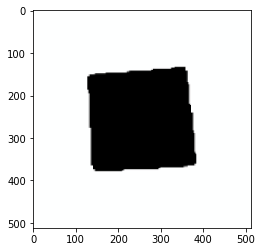

prediction -> square


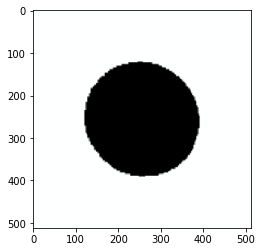

prediction -> Circle


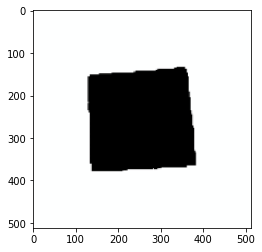

prediction -> square


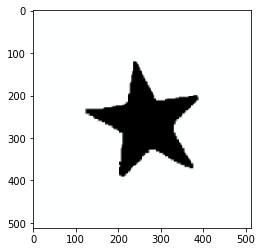

prediction -> star


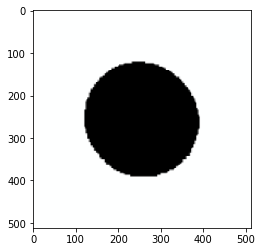

prediction -> Circle


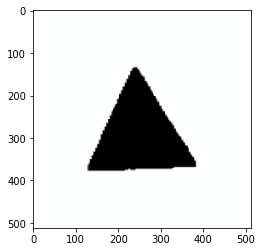

prediction -> Triangle


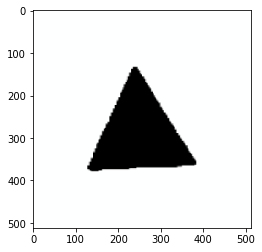

prediction -> Triangle


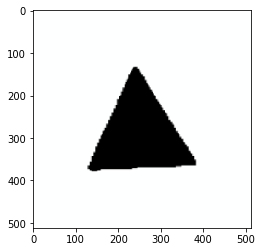

prediction -> Triangle


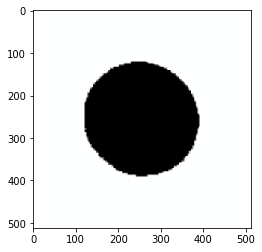

prediction -> Circle


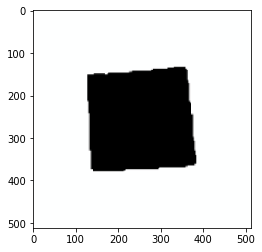

prediction -> square


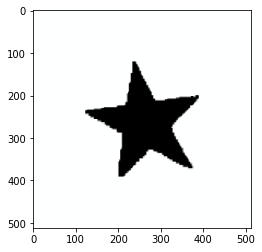

prediction -> star


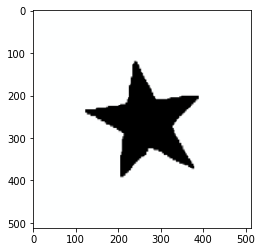

prediction -> star


In [9]:
for i, (images,labels) in enumerate(test_loader):
    imshow(torchvision.utils.make_grid(images))
    images=Variable(images.cuda())
    labels = Variable(labels.cuda())
    outputs = model(images)
    p,predicted = torch.max(outputs.data, 1)
    print('prediction -> {}'.format(labels_h[predicted[0]]))